

---


# **Telecom Customer Churn Prediction (Python)**

### Author: Lu Liu
<br>




---



# Mount Google Drive on Colab:

Enable loading external data from Google Drive by mounting your Google Drive into the Colab runtime's virtual machine:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now Google Drive is mounted on Colab. Run the block of testing code below to verify writing to a new file in Drive.

In [ ]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

# List of All Libraries

In [ ]:
## Import libraries for data preprocessing:
from pandas import DataFrame
import pandas as pd
import numpy as np

# imports random module 
import random 

## Import the Counter module -- a dict subclass for counting hashable objects.
from collections import Counter

## Import train_test_split from Sciket Learn for splitting the dataset:
from sklearn.model_selection import train_test_split

## Import KFold from Scikit Learn for K-Fold Cross Validation:
from sklearn.model_selection import KFold

## Import the OneHotEncoder from Scikit Learn for one hot encoding categorical variables:
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

from sklearn.pipeline import make_pipeline


## Import the Stratified ShuffleSplit cross-validator from Scikit Learn for Stratified Sampling:
from sklearn.model_selection import StratifiedShuffleSplit


# ## Import Ridge from Scikit Learn
# from sklearn.linear_model import Ridge
# ## Import Lasso from Scikit Learn
# from sklearn.linear_model import Lasso
# ## Import ElasticNet from Scikit Learn
# from sklearn.linear_model import ElasticNet

# ## Ridge Regression with built-in Cross Validation
# ## Lasso Regression with built-in Cross Validation
# ## ElasticNet Regression with built-in Cross Validation
# from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

## Import GridSearchCV for tuning the hyper-parameters of an estimator:
from sklearn.model_selection import GridSearchCV

## Import RandomizedSearchCV for tuning the hyper-parameters of an estimator:
from sklearn.model_selection import RandomizedSearchCV


## Important Validation Curve for Determine training and test scores for varying parameter values:
from sklearn.model_selection import validation_curve

# ## Import LinearRegression from Scikit Learn for Regression modeling:
# from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Import the cross_val_score function from Scikit Learn for cross-validation metrics:
from sklearn.model_selection import cross_val_score

## Import r2_score from Scikit Learn for computing the R-square value:
from sklearn.metrics import r2_score

## Import confusion_matrix from Scikit Learn for accuracy evaluation:
from sklearn.metrics import confusion_matrix

## Import accuracy_score from Scikit Learn for computing the prediction accuracy:
from sklearn.metrics import accuracy_score

## Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
## Can be used with binary, multiclass and multilabel classification with some restrictions.
from sklearn.metrics import roc_auc_score

## Import classification_report from Scikit Learn to summarize Precision, Recall, F1-Score, and Accuracy of the model:
from sklearn.metrics import classification_report


## Statsmodels supports specifying models using R-style formulas and pandas DataFrames:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# ## Install the latest version of imbalanced-learn to deal with imbalanced data:
# !pip install -U imbalanced-learn
# import imblearn
# print(imblearn.__version__)

# ## Import the RandomOverSampler module from imblearn:
# from imblearn.over_sampling import RandomOverSampler

# ## Import the RandomUnderSampler module from imblearn:
# from imblearn.under_sampling import RandomUnderSampler


## Import Matplotlib modules:
import matplotlib.pyplot as plt

## Set the output of plotting commands to be displayed inline in the notebook document (E.g., Jupyter, Colob):
%matplotlib inline

# ## Set the interactive plots embedded within the notebook that allow zoom and resize:
# %matplotlib notebook

## Import the Seaborn library for pretty statiscal visualization:
import seaborn as sns


## from IPython.display import Markdown, display

# import gzip
# import csv
# import json


import os

# Import pickle to save and load models to file:
import pickle

# from sklearn.externals import joblib

import torch



# ## Set TensorFlow to 1.x version:
# # %tensorflow_version 1.x

# ## TensorlFlow 2.0 upgrade script:
# import tensorflow as tf
# print(tf.__version__)


import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.3.0


# **Data Preprocessing**

## Data Description:

The dataset and its description is available at [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn). The goal of this task is to analyze the behavior of telecom customers and understand what factors are important to retain customers.
<br><br>
**Context**

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:


*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents


**Inspiration**

To explore this type of models and learn more about the subject.

<br>

---

<br>
About this file

**Telcom Customer Churn**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.



## Load the raw data:

In [ ]:
url = "https://raw.githubusercontent.com/techill/telecom-customer-churn-prediction/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(url, sep = ',')
# data = pd.read_csv(url, header=None, sep='\n')
# data = data[0].str.split(',', expand=True)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
## Return the total number of missing values in each column of the dataframe:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
## Convert a column of object data (i.e., string) to numeric data type:
## By setting errors=’coerce’, you’ll transform the non-numeric values into NaN.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

print(data.dtypes['TotalCharges'])

float64


In [ ]:
## Recheck the total number of missing values after changing the data type:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
## Drop the rows where at least one element is missing:
data = data.dropna()

In [ ]:
data.isnull().values.any()

False

# <font color = 'blue'>**Question 1**</font>
**1.       Visualize the univariate distribution of each input variable and the target variable “churn”.**

## <font color = 'blue'>Single-variable / Univariate Visualization of Each Variable (Input & Target):</font>

In [ ]:
## Drop the 'customerID' column from the dataframe:
data = data.drop(columns = 'customerID')
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
print(type(data['Churn']))

print(data.dtypes['Churn'])

print(data.dtypes['SeniorCitizen'])

<class 'pandas.core.series.Series'>
object
int64


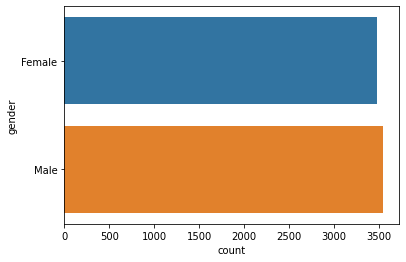

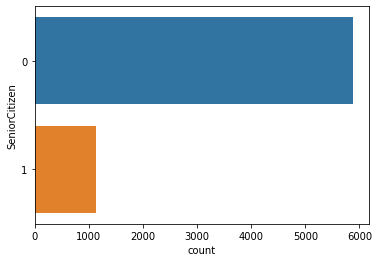

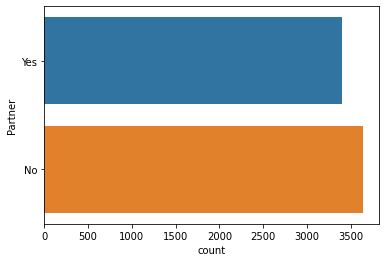

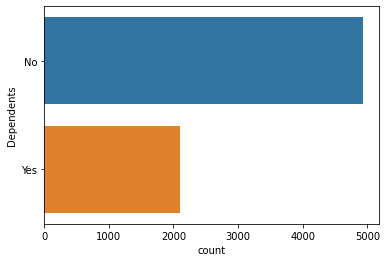

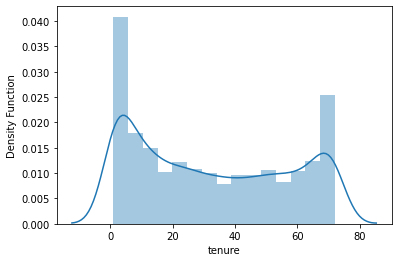

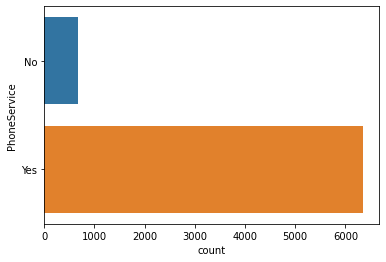

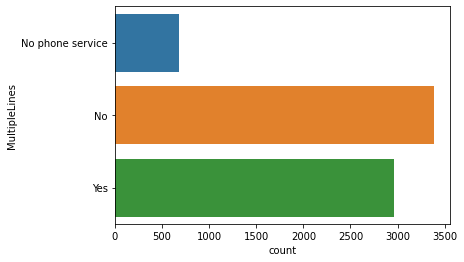

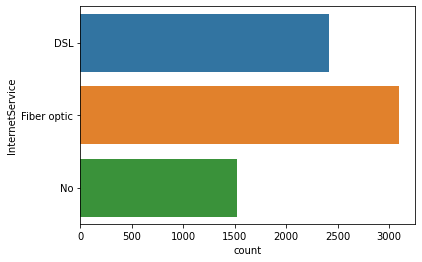

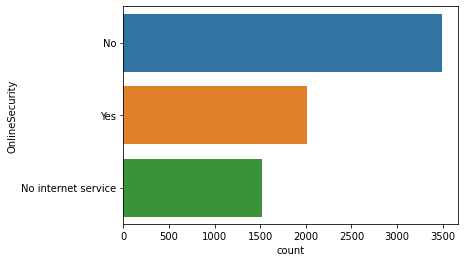

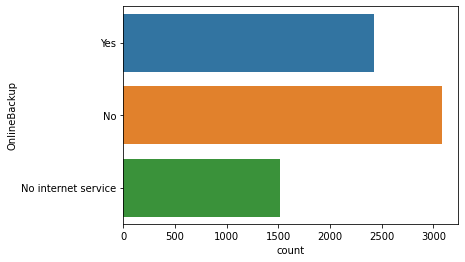

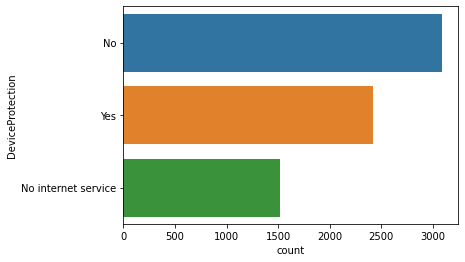

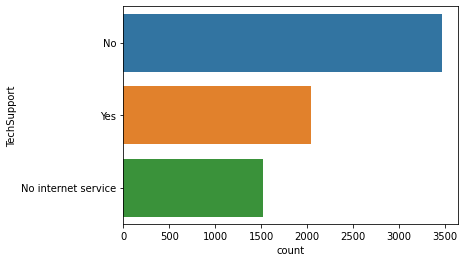

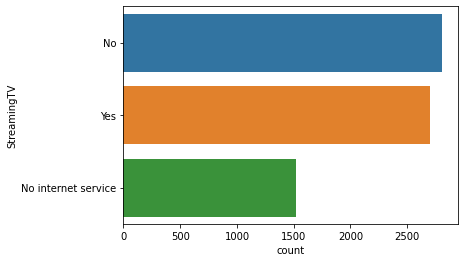

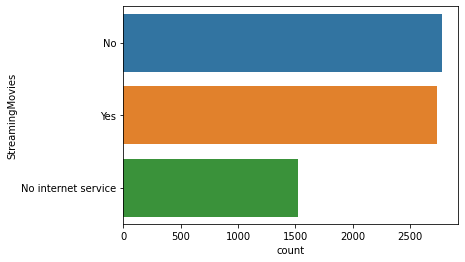

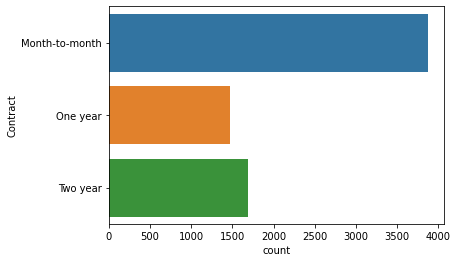

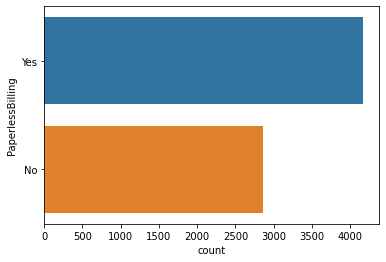

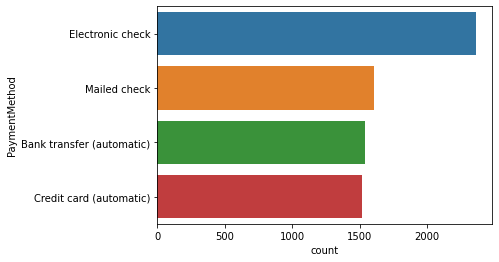

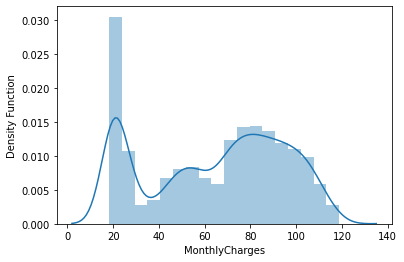

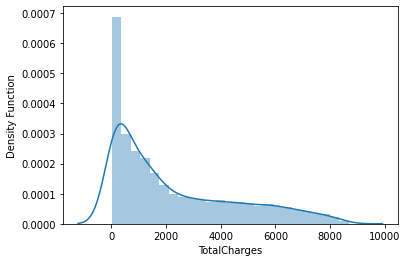

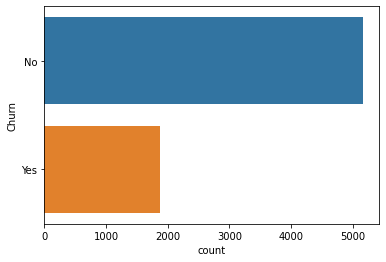

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plot a distribution plot for each variable via the loop:
for col in data.columns:
  plt.figure()

  ## Plot the univariate distribution of three numeric variable:
  if col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    sns.distplot(data[col], kde = True)
    ## Default Paramter: kde = True, Gaussian Kernel Density Estimate
    plt.ylabel("Density Function")

  ## Plot th univariate distribution of each categorical variable horizantally:
  else:
    # sns.countplot(x = data[col], orient = 'v')
    ## Seaborn countplot() Parameter: 
    ## x = col -- display vertically
    ## y = col -- display horizontally
    sns.countplot(y = col, data = data)

  plt.show()



## <font color = 'blue'>***Findings:***</font>

<font color = 'blue'> *The univariate distribution plots of each variable indicates that the data of some features, such as 'SeniorCitizen' and 'Dependents', are highly imbalanced; so does the target variable 'Churn'.*</font>







---



# <font color = 'blue'>**Question 2**</font>
**2. Split data into training and test sets. Build a pipeline for dealing with categorical variables. Evaluate logistic regression, support vector machines, k-nearest neighbors, and decision trees using cross-validation. How different are the results? How does scaling the numerical features with StandardScaler influence the results?**

## Q2 Functions:

In [ ]:
### Q2 Functions:

## Define a function for evaluating various classification models:
## Use transformed X, y with this function
def evaluate_model (name, model, X, y):
  print()
  print("Model: " + name)
  print()
  print(classification_report(y, 
                            model.predict(X), 
                            target_names = yLableBinarizer.classes_))
  print()
  
  cv_scores = cross_val_score(model, 
                        X, 
                        y.ravel(), 
                        scoring = 'accuracy')
                        ## Default scoring = None: Use the estimator’s default scorer
  print("Cross-Validation Scores:")
  print(cv_scores)
  print()
  # print("Accuracy: %0.2f (+/- %0.2f)" % 
  #       (results['cv'].mean(), results['cv'].std() * 2))
  print("Accuracy:")
  print("- CV Mean: %0.4f" % cv_scores.mean())
  print("- CV Standard Deviation: %0.4f" % cv_scores.std())
  print()
  print("Confusion Matrix:")
  print(confusion_matrix(y, model.predict(X)))
  print()
  # Plot confusion matrix:
  ax = plt.subplot()
  sns.heatmap(confusion_matrix(y, model.predict(X)), cmap="YlGnBu", annot = True)
  ax.set_xlabel("Predicted Label")
  ax.set_ylabel("True Label")
  ax.set_xticklabels(["No", "Yes"])
  ax.set_yticklabels(["No", "Yes"])
  ax.set_title("Confusion Matrix of " + name, fontsize = 14)
  plt.show()
  # plt.tight_layout()
  print()
  print("-----------------------------------------------------")
  print()
  # return {'cv_mean_accuracy': cv_scores.mean()}


## <font color = 'blue'>Split data into training and test sets:</font>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
## Assign all features to X_all:
X_all = data.iloc[:, 0:-1]  
## Select all rows, and the columns from 0th - the one before the last column.

## Assign the label to y_all:
y_all = data.iloc[:, -1]
## Select all rows, and the last column.


In [ ]:
print(type(X_all))
print(type(y_all))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
print(X_all.shape)
print(y_all.shape)

(7032, 19)
(7032,)


In [ ]:
## Import train_test_split from Sciket Learn for splitting the dataset:
from sklearn.model_selection import train_test_split

## Split the dataset into training and test data as 0.8:0.2
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size = 0.2, random_state = 123
)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)


(5625, 19)
(5625,)

(1407, 19)
(1407,)


## <font color = 'blue'>Build the ColumnTransformer for full predictors, transform y labels of the target variable, and create the Pipeline for each model:</font>

### <font color = 'blue'>Build the ColumnTransformer with & without scaling the input variables:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

## Construct a ColumnTransformer without scaling numeric features:
column_trans_no_scale = make_column_transformer(    
    ## Set parameter: sparse = False (returning array instead of matrix), 
    ## Set parameter: handle_unknown = 'ignore' (ignoring error 
    ## when the test data contains any unseen categories so the test data has the 
    ## same dimension (number of columns) as the training model:
    (OneHotEncoder(sparse = False, handle_unknown = 'ignore'), 
     make_column_selector(dtype_include = object)),
    ## To select strings you must use the object dtype, 
    ## but note that this will return all object dtype columns.

    ## By specifying remainder='passthrough', all remaining columns 
    ## that were not specified in transformers will be automatically passed through.
    remainder = 'passthrough'
)


## Transform the traing predictors without scaling:
X_train_transformed_non_scaled = column_trans_no_scale.fit_transform(X_train)




## Construct a ColumnTransformer with scaling numeric features:
column_trans_scale = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include = np.number)),
    ## To select all numeric types, use np.number or 'number'.

    ## Set parameter: sparse = False (returning array instead of matrix), 
    ## Set parameter: handle_unknown = 'ignore' (ignoring error 
    ## when the test data contains any unseen categories so the test data has the 
    ## same dimension (number of columns) as the training model:
    (OneHotEncoder(sparse = False, handle_unknown = 'ignore'), 
     make_column_selector(dtype_include = object)),
    ## To select strings you must use the object dtype, 
    ## but note that this will return all object dtype columns.

    
    ## By specifying remainder='passthrough', all remaining columns 
    ## that were not specified in transformers will be automatically passed through.
    remainder = 'passthrough'
)


## Transform the traing predictors with scaling:
X_train_transformed_scaled = column_trans_scale.fit_transform(X_train)



In [ ]:
print(type(X_train))
print(type(y_train))
print(type(X_train_transformed_non_scaled))
print(type(X_train_transformed_scaled))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### <font color = 'blue'>Transform categorical y labels into a numeric array: (Scikit Learn suggests that a one-hot encoding of y labels should use a LabelBinarizer instead)</font>

In [ ]:
## Transform categorical y labels into a numeric array:
from sklearn.preprocessing import LabelBinarizer

yLableBinarizer = LabelBinarizer()

y_train_transformed = yLableBinarizer.fit_transform(y_train)

y_train_transformed


array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
yLableBinarizer.classes_

array(['No', 'Yes'], dtype='<U3')

In [ ]:
print(X_train_transformed_non_scaled.shape)
print(X_train_transformed_scaled.shape)
print(y_train_transformed.shape)

(5625, 45)
(5625, 45)
(5625, 1)


### <font color = 'blue'> Build the Pipeline and train each model:</font>

In [ ]:
from sklearn.pipeline import Pipeline

## Logistic Regression Classifier:
from sklearn.linear_model import LogisticRegression

## Support Vector Machine Classifier:
from sklearn.svm import SVC

## K-Nearest Neighbors Classifier:
from sklearn.neighbors import KNeighborsClassifier

## Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier

## Cross-Vilidation Score:
from sklearn.model_selection import cross_val_score


#### <font color = 'blue'>**Logistic Regression:**<font>

In [ ]:
# Construct the pipelines for Logistic Regression WITHOUT StandardScalar:
pipeline_logReg_no_scale = Pipeline([
                    ('column_transformer_no_scale', column_trans_no_scale),
                    ('logistic_regression', LogisticRegression(max_iter = 1000))
                    ## Set max_iter = 1000 to (default = 100) fix the Convergence Warning below
                    ## ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
])

## Fit the pipeline to the data: 
## (Use the transformed y labels as it's done outside the ColumnTransfer)
pipeline_logReg_no_scale.fit(X_train, y_train_transformed)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('column_transformer_no_scale',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc93ce00668>)],
                                   verbose=False)),
                ('logistic_regression',
                 Logis

In [ ]:
## Extract the trained model from the pipeline:
model_logReg_no_scale = pipeline_logReg_no_scale['logistic_regression']

## Print the CV scores:
## Flatten the array of transformed y labels with ravel():
## array.ravel is equivalent to reshape(-1, order=order)
print(cross_val_score(model_logReg_no_scale, 
                      X_train_transformed_non_scaled, 
                      y_train_transformed.ravel(), 
                      scoring = 'accuracy')
                      ## Default scoring = None: Use the estimator’s default scorer 
                      ## (LogisticRegression: mean accuracy)
)


[0.80888889 0.79555556 0.79377778 0.80355556 0.81244444]


In [ ]:
## Construct the pipelines for Logistic Regression WITH StandardScalar:
pipeline_logReg_scale = Pipeline([
                    ('column_transformer_scale', column_trans_scale),
                    ('logistic_regression', LogisticRegression(max_iter = 1000))
                    ## Set max_iter = 1000 to (default = 100) fix the Convergence Warning below
                    ## ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
])

## Fit the pipeline to the data: 
## (Use the transformed y labels as it's done outside the ColumnTransfer)
pipeline_logReg_scale.fit(X_train, y_train_transformed)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('column_transformer_scale',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc93ce00390>),
                                                 ('onehotencoder',
                                                  OneHotEn...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc93ce00cc0>)],
                                  

In [ ]:
## Extract the trained model from the pipeline:
model_logReg_scale = pipeline_logReg_scale['logistic_regression']

## Print the CV scores:
print(cross_val_score(model_logReg_scale, 
                      X_train_transformed_scaled, 
                      y_train_transformed.ravel(), 
                      scoring = 'accuracy')
                      ## Default scoring = None: Use the estimator’s default scorer 
                      ## (LogisticRegression: mean accuracy)
)

[0.808      0.79911111 0.79111111 0.8        0.816     ]


In [ ]:
# cross_validation(model_logReg_scale, X_train_transformed_scaled, y_train_transformed.ravel())

In [ ]:
# accuracy_score(y_train_transformed, model_logReg_scale.predict(X_train_transformed_scaled))

In [ ]:
# print(classification_report(y_train_transformed, 
#                             model_logReg_scale.predict(X_train_transformed_scaled), 
#                             target_names = yLableBinarizer.classes_
#                             ))

##### <font color = 'blue'>Compare the results of Logistic Regression models, which was fit with and without scaling input variables:<font>


Model: Logistic Regression WITHOUT StandardScaler

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      4167
         Yes       0.65      0.53      0.58      1458

    accuracy                           0.80      5625
   macro avg       0.75      0.71      0.73      5625
weighted avg       0.79      0.80      0.80      5625


Cross-Validation Scores:
[0.80888889 0.79555556 0.79377778 0.80355556 0.81244444]

Accuracy:
- CV Mean: 0.8028
- CV Standard Deviation: 0.0073

Confusion Matrix:
[[3758  409]
 [ 691  767]]



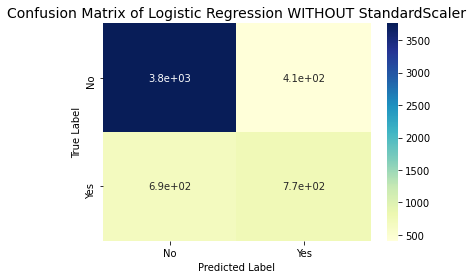


-----------------------------------------------------



In [ ]:
evaluate_model("Logistic Regression WITHOUT StandardScaler", 
               model_logReg_no_scale, 
               X_train_transformed_non_scaled, 
               y_train_transformed)


Model: Logistic Regression WITH StandardScaler

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      4167
         Yes       0.65      0.54      0.59      1458

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.80      0.80      0.80      5625


Cross-Validation Scores:
[0.808      0.79911111 0.79111111 0.8        0.816     ]

Accuracy:
- CV Mean: 0.8028
- CV Standard Deviation: 0.0085

Confusion Matrix:
[[3741  426]
 [ 675  783]]



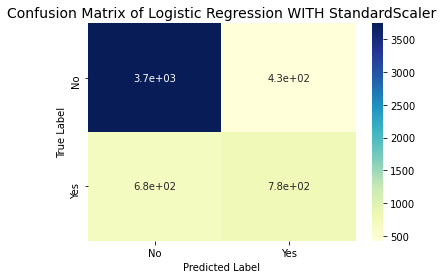


-----------------------------------------------------



In [ ]:
evaluate_model("Logistic Regression WITH StandardScaler", 
               model_logReg_scale, 
               X_train_transformed_scaled, 
               y_train_transformed)

#### <font color = 'blue'>**Support Vector Machine:**</font>

In [ ]:
## Construct the pipelines for SVM (SVC) WITH StandardScalar:
pipeline_svm_svc_scale = Pipeline([
                    ('column_transformer_scale', column_trans_scale),
                    ('svm_svc', SVC())
                    ## Default Parameters: C = 1.0, kernel = rbf
])

## Fit the pipeline to the data: 
## (Use the transformed y labels as it's done outside the ColumnTransfer)
pipeline_svm_svc_scale.fit(X_train, y_train_transformed)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('column_transformer_scale',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc93ce00390>),
                                                 ('onehotencoder',
                                                  OneHotEn...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc93ce00cc0>)],
                                  

In [ ]:
## Extract the trained model from the pipeline:
model_svm_svc_scale = pipeline_svm_svc_scale['svm_svc']

# ## Print the classification report for the model:
# evaluate_model("Support Vector Machine (SVC) WITH StandardScaler", 
#                model_svm_svc_scale, 
#                X_train_transformed_scaled, 
#                y_train_transformed)

#### <font color = 'blue'>**K-Nearest Neighbors:**</font>

In [ ]:
## Construct the pipelines for KNN WITH StandardScalar:
pipeline_knn_scale = Pipeline([
                    ('column_transformer_scale', column_trans_scale),
                    ('knn', KNeighborsClassifier())
                    ## Parameter: n_neighborsint, optional (default = 5)
])

## Fit the pipeline to the data: 
## (Use the transformed y labels as it's done outside the ColumnTransfer)
pipeline_knn_scale.fit(X_train, y_train_transformed)


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('column_transformer_scale',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc93ce00390>),
                                                 ('onehotencoder',
                                                  OneHotEn...ories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy

In [ ]:
## Extract the trained model from the pipeline:
model_knn_scale = pipeline_knn_scale['knn']

# ## Print the classification report for the model:
# evaluate_model("K-Nearest Neighbors WITH StandardScaler", 
#                model_knn_scale, 
#                X_train_transformed_scaled, 
#                y_train_transformed)

#### <font color = 'blue'>**Decision Trees:**</font>

In [ ]:
## Construct the pipelines for Decision Tree WITH StandardScalar:
pipeline_decTree_scale = Pipeline([
                    ('column_transformer_scale', column_trans_scale),
                    ('decision_tree', DecisionTreeClassifier())])

## Fit the pipeline to the data: 
## (Use the transformed y labels as it's done outside the ColumnTransfer)
pipeline_decTree_scale.fit(X_train, y_train_transformed)


Pipeline(memory=None,
         steps=[('column_transformer_scale',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc93ce00390>),
                                                 ('onehotencoder',
                                                  OneHotEn...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc93ce00cc0>)],
                                  

In [ ]:
## Extract the trained model from the pipeline:
model_decTree_scale = pipeline_decTree_scale['decision_tree']

# ## Print the classification report for the model:
# evaluate_model("Decision Trees WITH StandardScaler", 
#                model_decTree_scale, 
#                X_train_transformed_scaled, 
#                y_train_transformed)

### <font color = 'blue'>Compare the performance of all models trained with default parameters:</font>


Model: Standard Logistic Regression WITHOUT StandardScaler

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      4167
         Yes       0.65      0.53      0.58      1458

    accuracy                           0.80      5625
   macro avg       0.75      0.71      0.73      5625
weighted avg       0.79      0.80      0.80      5625


Cross-Validation Scores:
[0.80888889 0.79555556 0.79377778 0.80355556 0.81244444]

Accuracy:
- CV Mean: 0.8028
- CV Standard Deviation: 0.0073

Confusion Matrix:
[[3758  409]
 [ 691  767]]



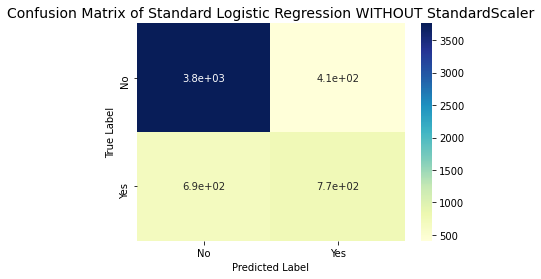


-----------------------------------------------------


Model: Standard Logistic Regression WITH StandardScaler

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      4167
         Yes       0.65      0.54      0.59      1458

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.80      0.80      0.80      5625


Cross-Validation Scores:
[0.808      0.79911111 0.79111111 0.8        0.816     ]

Accuracy:
- CV Mean: 0.8028
- CV Standard Deviation: 0.0085

Confusion Matrix:
[[3741  426]
 [ 675  783]]



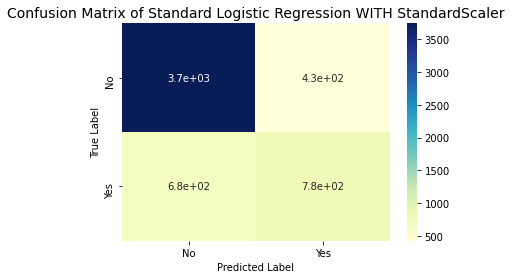


-----------------------------------------------------


Model: Standard Support Vector Machine (SVC) WITH StandardScaler

              precision    recall  f1-score   support

          No       0.84      0.93      0.88      4167
         Yes       0.72      0.50      0.59      1458

    accuracy                           0.82      5625
   macro avg       0.78      0.71      0.73      5625
weighted avg       0.81      0.82      0.81      5625


Cross-Validation Scores:
[0.792      0.77955556 0.79911111 0.81422222 0.81422222]

Accuracy:
- CV Mean: 0.7998
- CV Standard Deviation: 0.0133

Confusion Matrix:
[[3879  288]
 [ 735  723]]



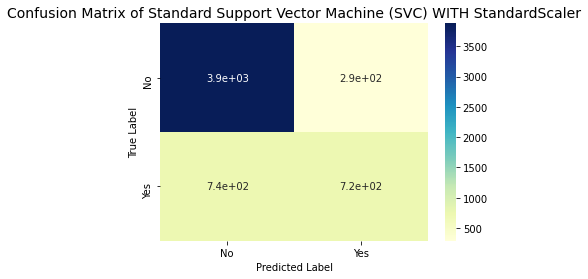


-----------------------------------------------------


Model: Standard K-Nearest Neighbors WITH StandardScaler

              precision    recall  f1-score   support

          No       0.88      0.90      0.89      4167
         Yes       0.70      0.64      0.67      1458

    accuracy                           0.83      5625
   macro avg       0.79      0.77      0.78      5625
weighted avg       0.83      0.83      0.83      5625


Cross-Validation Scores:
[0.77066667 0.752      0.74666667 0.76888889 0.76      ]

Accuracy:
- CV Mean: 0.7596
- CV Standard Deviation: 0.0093

Confusion Matrix:
[[3765  402]
 [ 528  930]]



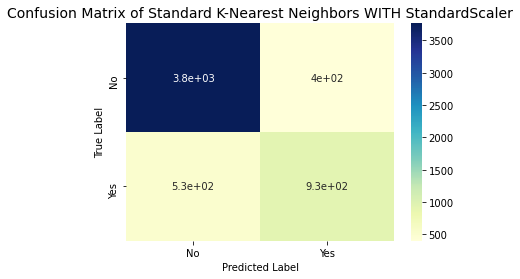


-----------------------------------------------------


Model: Standard Decision Trees WITH StandardScaler

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      4167
         Yes       1.00      0.99      1.00      1458

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625


Cross-Validation Scores:
[0.72355556 0.736      0.74222222 0.72977778 0.73777778]

Accuracy:
- CV Mean: 0.7339
- CV Standard Deviation: 0.0065

Confusion Matrix:
[[4166    1]
 [  12 1446]]



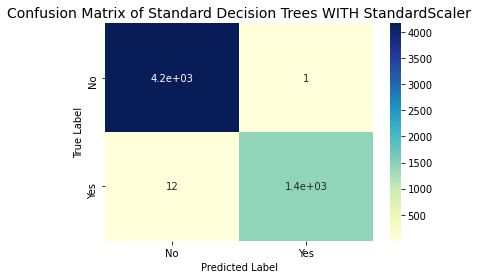


-----------------------------------------------------



In [ ]:
## Print the classification report for the model:
evaluate_model("Standard Logistic Regression WITHOUT StandardScaler", 
               model_logReg_no_scale, 
               X_train_transformed_non_scaled, 
               y_train_transformed)

evaluate_model("Standard Logistic Regression WITH StandardScaler", 
               model_logReg_scale, 
               X_train_transformed_scaled, 
               y_train_transformed)

evaluate_model("Standard Support Vector Machine (SVC) WITH StandardScaler", 
               model_svm_svc_scale, 
               X_train_transformed_scaled, 
               y_train_transformed)

evaluate_model("Standard K-Nearest Neighbors WITH StandardScaler", 
               model_knn_scale, 
               X_train_transformed_scaled, 
               y_train_transformed)

evaluate_model("Standard Decision Trees WITH StandardScaler", 
               model_decTree_scale, 
               X_train_transformed_scaled, 
               y_train_transformed)



In [ ]:
## Find the model that has the highest Training Accuracy:

model_list_q2 = [model_logReg_scale, model_svm_svc_scale, 
          model_knn_scale, model_decTree_scale]

accuracy_max = 0

for model in model_list_q2:
  model_accu = accuracy_score(model.predict(X_train_transformed_scaled), y_train_transformed)
  if model_accu > accuracy_max:
    accuracy_max = model_accu
    model_accuracy_max = model

print("Model with StandardScalar ith the highest Training Accuracy:")
print(str(model))
print("Training Accuracy: " + str(accuracy_max))


Model with StandardScalar ith the highest Training Accuracy:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Training Accuracy: 0.9976888888888888


## <font color = 'blue'>***Findings:***</font>

<font color = 'blue'>*1. Comparing the two Logistic Regression models without & with applying StandardScaler, the two models achieve the same accuracy with cross-validation, as well as some scores for the class prediction. However, the scaled Logistic Regression model achieves better performance on the Precision score of the "Yes" class and the Recall and F-1 scores for the "No" class; it also scores higher than the non-scaled model on the Weighted Average of the Recall score. The results indicates that utilizing StandardScaler did improve the performance of the model. In addition, scaling the data is also recommended by Scikit Learn as the it may ease the data convergence and memory issues.*</font> 

<font color = 'blue'>*2. On the other hand, among the four models whicl all apply StandardScaler, the Decision Tree classifier generates the highest Training Accuracy at 0.9977, but its Cross-Validation Mean of Accuracy is only 0.73, which is the lowest compared to Logistic Regression (0.8028), SVM (0.7998), and following by KNN (0.7596). These results suggest that the Decision Tree model is overfitting most.*</font>







# <font color = 'blue'>**Question 3**</font>
**3. Tune the model parameters:**



*   a. Visualize the performance of logistic regression as a function of the regularization parameter.
*   b. Visualize the performance of linear SVM as a function of the regularization parameter.
*   c. Visualize the performance of kNN as a function of k.
*   d. Use [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) to tune the decision tree model with max_depth, max_leaf_nodes, min_samples_split, min_samples_leaf, and min_weight_fraction_leaf.





## Q3 Functions:

In [ ]:
### Q3 Functions:

## Define a function to show results of all Grid/RandomizedSearchCV models:
def get_grid_rand_search_cv_results (name, model):
  print()
  print("Model: " + name)
  # print("Best Accuracy Score: %0.2f" % model.best_score_)
  # print("Best Parameters: " + str(model.best_params_))
  print()
  print(model.best_estimator_)
  print("Best Parameters: " + str(model.best_params_))
  print("Best Accuracy Score: " + str(model.best_score_))
  print()
  print("-----------------------------------------------------")
  print()




## Define a function to plot the Validation Curve for the models with 'param_C' 
## through Scikit Learn ValidationCurve (i.e. Logistic Regression, Linear SVM):
def plot_validation_curve(model, name):
  # from sklearn.model_selection import validation_curve

  ## Define the parameter for x-axis:
  ## model.cv_results_['param_C'] returns a Numpy Masked Array.
  ## To access the data of C values, use ma.data to get a list:
  param_range = model.cv_results_['param_C'].data
  # ## Or use compressed() with a ma (Masked Array).
  # param_range = model.cv_results_['param_C'].compressed()
  # print(param_range)
  # param_range.shape

  ## Define the parameter for y-axis:
  mean_train_score_arr = model.cv_results_['mean_train_score']
  mean_test_score_arr = model.cv_results_['mean_test_score']
  std_train_score_arr = model.cv_results_['std_train_score']
  std_test_score_arr = model.cv_results_['std_test_score']
  ## test_score is actually the Validation Score for the training dataset.



  ## Plot the validation Curve:
  plt.figure()
  ## Plot mean accuracy scores for training and validation sets:
  plt.plot(param_range, mean_train_score_arr, label = "Training Score")
  plt.plot(param_range, mean_test_score_arr, label = "Cross-validation Score")

  # ## Plot accurancy bands for training and validation sets:
  # plt.fill_between(param_range, mean_train_score_arr - std_train_score_arr, 
  #                  mean_train_score_arr + std_train_score_arr, color = "gray")
  # plt.fill_between(param_range, mean_test_score_arr - std_test_score_arr, 
  #                  mean_test_score_arr + std_test_score_arr, color = "gainsboro")

  ## Create plot:
  plt.title("Validation Curve of " + name)
  plt.xlabel("Regulation Parameter C")
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.legend(loc = "best")
  ## Default legend Parameter: loc : str or pair of floats, 
  ## default: rcParams["legend.loc"] = 'best' ('best' for axes, 'upper right' for figures)
  plt.rcParams['figure.figsize'] = (6.4, 4.8)

  plt.show()




## <font color = 'blue'>a. Visualize the performance of logistic regression as a function of the regularization parameter.</font>

### <font color = 'blue'>Apply GridSearchCV to tune the regularization parameter C of the Logistic Regression model:</font>

In [ ]:
from sklearn.metrics import make_scorer

## Import GridSearchCV for tuning the hyper-parameters of an estimator:
from sklearn.model_selection import GridSearchCV

## Find optimal regulation with GridSearchCV:

# penalty = ["l1", "l2"]
# C = np.logspace(-4, 4, 20)
# solver = ['liblinear']

param_grid_logReg = dict({"penalty": ['l1', 'l2'], 
                          "C": np.logspace(-4, 4, 20), 
                          "solver": ['liblinear']
                          })

# scoring = {'precision', 'recall', 'f1', 'accuracy': make_scorer()}


In [ ]:
## GridSearchCV Parameter: n_jobs = -1 means using all processors.
grid_logReg_scale = GridSearchCV(estimator = model_logReg_scale, 
                                 param_grid = param_grid_logReg, 
                                 scoring = 'accuracy', 
                                 n_jobs = -1, cv = 5, 
                                #  refit = 'accuracy', 
                                 verbose = 1, 
                                 return_train_score = True)

In [ ]:
model_grid_logReg_scale = grid_logReg_scale.fit(X_train_transformed_scaled, 
                                                y_train_transformed.ravel())


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   20.2s finished


### <font color = 'blue'>**Save & Load Model from file:**</font>

#### <font color = 'blue'>***Save trained model to the file in Google Drive using Pickle:***</font>

In [ ]:
pwd

'/content'

In [ ]:
import pickle

# from sklearn.externals import joblib

## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Save the model as .pkl file in the Drive:
pickle.dump(model_grid_logReg_scale, open(file_path+'model_grid_logReg_scale.pkl', 'wb'))


#### <font color = 'blue'>***Load the trained model from the file in Google Drive using Pickle:***</font>

In [ ]:
import pickle

## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Load the model as .pkl file from the Drive:
model_grid_logReg_scale = pickle.load(open(file_path+'model_grid_logReg_scale.pkl', 'rb'))


### <font color = 'blue'>Find the best model and evaluate the best estimator performance: </font>

In [ ]:
get_grid_rand_search_cv_results("Logistic Regression with GridSearchCV", 
                                model_grid_logReg_scale)



Model: Logistic Regression with GridSearchCV

LogisticRegression(C=4.281332398719396, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Best Parameters: {'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy Score: 0.8039111111111111

-----------------------------------------------------



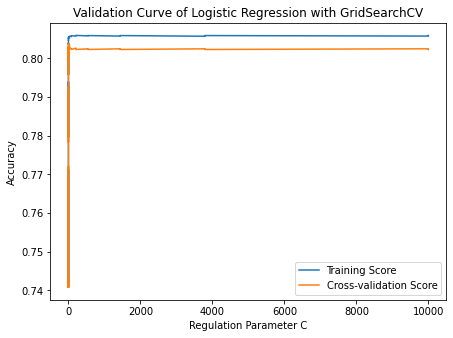

In [ ]:
## Plot the validation curve by calling the user-defined function:
plot_validation_curve(model_grid_logReg_scale, "Logistic Regression with GridSearchCV")



Model: Logistic Regression with GridSearchCV - Best Estimator

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      4167
         Yes       0.65      0.54      0.59      1458

    accuracy                           0.81      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.80      0.81      0.80      5625


Cross-Validation Scores:
[0.81066667 0.8        0.79288889 0.8        0.816     ]

Accuracy:
- CV Mean: 0.8039
- CV Standard Deviation: 0.0083

Confusion Matrix:
[[3742  425]
 [ 669  789]]



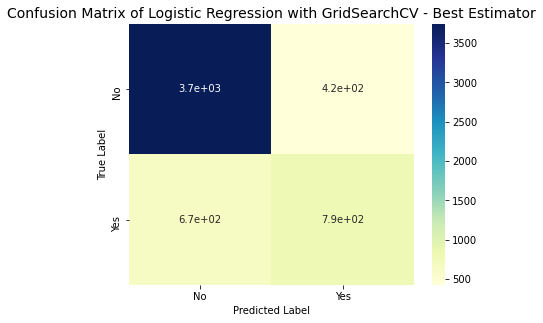


-----------------------------------------------------



In [ ]:
## The best RandomizedSearchCV model is model.best_estimator_, 
## use it to fit to data and print a classification report:
evaluate_model("Logistic Regression with GridSearchCV - Best Estimator", 
               model_grid_logReg_scale.best_estimator_, 
               X_train_transformed_scaled, 
               y_train_transformed)


### <font color = 'blue'>Multi-metric evaluation on cross_val_score and GridSearchCV:</font>

In [ ]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
## GridSearchCV Parameter: n_jobs = -1 means using all processors.
grid_logReg_scale_multi_metrics = GridSearchCV(estimator = model_logReg_scale, 
                                 param_grid = param_grid_logReg, 
                                 scoring = ['precision', 'recall', 'f1', 'accuracy'], 
                                 n_jobs = -1, cv = 5, 
                                 refit = 'accuracy', 
                                 verbose = 1, 
                                 return_train_score = True)


In [ ]:
model_grid_logReg_scale_multi_metrics = grid_logReg_scale_multi_metrics.fit(X_train_transformed_scaled, 
                                                y_train_transformed.ravel())


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   20.3s finished


In [ ]:
model_grid_logReg_scale_multi_metrics.scorer_

{'accuracy': make_scorer(accuracy_score),
 'f1': make_scorer(f1_score, average=binary),
 'precision': make_scorer(precision_score, average=binary),
 'recall': make_scorer(recall_score, average=binary)}

In [ ]:
# model_grid_logReg_scale.cv_results_

In [ ]:
print("Mean Train Precision:", model_grid_logReg_scale_multi_metrics.cv_results_['mean_train_precision'].mean())
print("Mean Test Precision:", model_grid_logReg_scale_multi_metrics.cv_results_['mean_test_precision'].mean())
print()
print("Mean Train Recall:", model_grid_logReg_scale_multi_metrics.cv_results_['mean_train_recall'].mean())
print("Mean Test Recall:", model_grid_logReg_scale_multi_metrics.cv_results_['mean_test_recall'].mean())
print()
print("Mean Train F1 Score:", model_grid_logReg_scale_multi_metrics.cv_results_['mean_train_f1'].mean())
print("Mean Test F1 Score:", model_grid_logReg_scale_multi_metrics.cv_results_['mean_test_f1'].mean())
print()
print("Mean Train Accuracy:", model_grid_logReg_scale_multi_metrics.cv_results_['mean_train_accuracy'].mean())
print("Mean Test Accuracy:", model_grid_logReg_scale_multi_metrics.cv_results_['mean_test_accuracy'].mean())
print()


Mean Train Precision: 0.5842190104064545
Mean Test Precision: 0.5828297764678487

Mean Train Recall: 0.42761538727234516
Mean Test Recall: 0.423327860942428

Mean Train F1 Score: 0.4795556227140795
Mean Test F1 Score: 0.4752376266123538

Mean Train Accuracy: 0.7934388888888888
Mean Test Accuracy: 0.791511111111111



In [ ]:
print("Best Logistic Regression Model with GridSearchCV:")
print()
print(model_grid_logReg_scale_multi_metrics.best_estimator_)
print("Best Parameters: " + str(model_grid_logReg_scale_multi_metrics.best_params_))
print("Best Accuracy Score: " + str(model_grid_logReg_scale_multi_metrics.best_score_))
# print("Best Accuracy Score: %0.2f" % model_grid_logReg_scale_multi_metrics.best_score_)
print()


Best Logistic Regression Model with GridSearchCV:

LogisticRegression(C=4.281332398719396, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Best Parameters: {'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy Score: 0.8039111111111111



### <font color = 'blue'>Compare the best model with the standard model: </font>

In [ ]:
## Review the CV Mean Accuracy of the standard Logistic Regression model trained in Q2:
print("Standard Logistic Regression Model:")
print("CV Mean Accuracy:", 
      cross_val_score(model_logReg_scale, 
                      X_train_transformed_scaled, 
                      y_train_transformed.ravel()).mean())


Standard Logistic Regression Model:
CV Mean Accuracy: 0.8028444444444445



Model: Standard Logistic Regression Model

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      4167
         Yes       0.65      0.54      0.59      1458

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.80      0.80      0.80      5625


Cross-Validation Scores:
[0.808      0.79911111 0.79111111 0.8        0.816     ]

Accuracy:
- CV Mean: 0.8028
- CV Standard Deviation: 0.0085

Confusion Matrix:
[[3741  426]
 [ 675  783]]



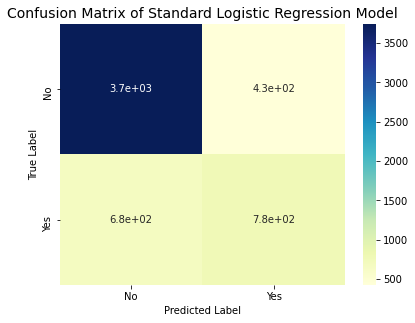


-----------------------------------------------------



In [ ]:
## Review the performance of the standard Logistic Regression model trained in Q2:
evaluate_model("Standard Logistic Regression Model", 
               model_logReg_scale, 
               X_train_transformed_scaled, 
               y_train_transformed.ravel())


### <font color = 'blue'>***Findings:***</font>

<font color = 'blue'>*1. The best Logistic Regression model selected by applying GridSearchCV makes very little improvement of only 0.1% on Cross-Validation Accuracy. Both the standard and GridSearchCV model have a approximately 80% Cross-Validation Accuracy.*</font>

**Cross-Validation Accuracy:**
1.   ***Best Logistic Regression model turned by GridSearchCV***<br> - CV Mean: 0.8039<br> - Best Parameters: {'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}
2.   **Standard Logistic Regression model**<br> - CV Mean: 0.8028<br> - Parameters: default {'C' = 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}



**Training Accuracy:**
1.   ***Best Logistic Regression model turned by GridSearchCV***<br> - Accuracy: 0.81<br> - Best Parameters: {'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}
2.   ***Standard Logistic Regression model***<br> - Accuracy: 0.80<br> - Parameters: default {'C' = 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


<font color = 'blue'>2. *The regulation parameter C reaches an elbow point at 4.281332398719396, which give the best accuracy.*</font>



---






## <font color = 'blue'>b. Visualize the performance of linear SVM as a function of the regularization parameter.</font>

### <font color = 'blue'>Apply GridSearchCV to tune the regularization parameter C of the Linear SVM model:</font>

In [ ]:
## Find optimal regulation with GridSearchCV:

param_grid_svm_svc_lin = dict({"C": np.logspace(-4, 4, 10), 
                               "kernel": ['linear']
                               })


In [ ]:
## GridSearchCV Parameter: n_jobs = -1 means using all processors.
grid_svm_svc_lin_scale = GridSearchCV(estimator = model_svm_svc_scale, 
                                 param_grid = param_grid_svm_svc_lin, 
                                 scoring = 'accuracy', 
                                 n_jobs = -1, cv = 5, verbose = 1, 
                                 return_train_score = True)


<font color = 'red'>++++++++++++++++++++++++++++++++

DO NOT RERUN THIS BLOCK OF CODE EVERYTIME. It costs more than 1 hour to complete.</font>

In [ ]:
## This model takes about 74.5 min to be finished!!
model_grid_svm_svc_lin_scale = grid_svm_svc_lin_scale.fit(X_train_transformed_scaled, 
                                                y_train_transformed.ravel())


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 74.5min finished


<font color = 'red'>++++++++++++++++++++++++++++++++</font>

### <font color = 'blue'>**Save & Load Model from file:**</font>

#### <font color = 'blue'>***Save trained model to the file in Google Drive using Pickle:***</font>

In [ ]:
pwd

'/content'

In [ ]:
import pickle

# from sklearn.externals import joblib

## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Save the model as .pkl file in the Drive:
pickle.dump(model_grid_svm_svc_lin_scale, open(file_path+'model_grid_svm_svc_lin_scale.pkl', 'wb'))


#### <font color = 'blue'>***Load the trained model from the file in Google Drive using Pickle:***</font>

In [ ]:
import pickle

## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Load the model as .pkl file from the Drive:
model_grid_svm_svc_lin_scale = pickle.load(open(file_path+'model_grid_svm_svc_lin_scale.pkl', 'rb'))


### <font color = 'blue'>Find the best model and evaluate the best estimator performance: </font>

In [ ]:
get_grid_rand_search_cv_results("Linear SVM with GridSearchCV", 
                                model_grid_svm_svc_lin_scale)



Model: Linear SVM with GridSearchCV

SVC(C=0.005994842503189409, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Best Parameters: {'C': 0.005994842503189409, 'kernel': 'linear'}
Best Accuracy Score: 0.8014222222222221

-----------------------------------------------------



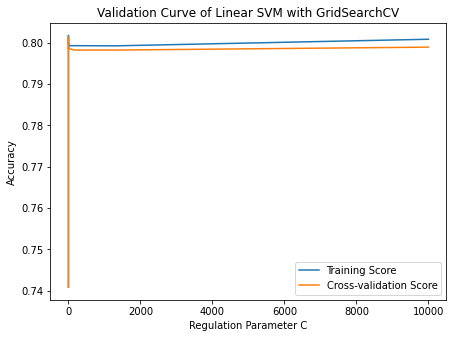

In [ ]:
plot_validation_curve(model_grid_svm_svc_lin_scale, "Linear SVM with GridSearchCV")


Model: Linear SVM with GridSearchCV - Best Estimator

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      4167
         Yes       0.66      0.50      0.57      1458

    accuracy                           0.80      5625
   macro avg       0.75      0.70      0.72      5625
weighted avg       0.79      0.80      0.79      5625


Cross-Validation Scores:
[0.79911111 0.78666667 0.80355556 0.80088889 0.81688889]

Accuracy:
- CV Mean: 0.8014
- CV Standard Deviation: 0.0097

Confusion Matrix:
[[3785  382]
 [ 729  729]]



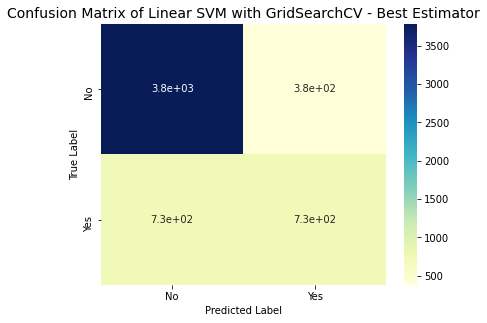


-----------------------------------------------------



In [ ]:
## The best GridSearchCV model is model.best_estimator_, 
## use it to fit to data and print a classification report:
evaluate_model("Linear SVM with GridSearchCV - Best Estimator", 
               model_grid_svm_svc_lin_scale.best_estimator_, 
               X_train_transformed_scaled, 
               y_train_transformed)


### <font color = 'blue'>Apply RandomizedSearchCV to tune the regularization parameter C of the Linear SVM model:</font>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
## RandomizedSearchCV Parameter: n_jobs = -1 means using all processors.
rand_svm_svc_lin_scale = RandomizedSearchCV(estimator = model_svm_svc_scale, 
                                 param_distributions = param_grid_svm_svc_lin,
                                 ## Use exactly same param values as GridSearchCV. 
                                 scoring = 'accuracy', 
                                 n_jobs = -1, cv = 5, verbose = 1, 
                                 return_train_score = True)

<font color = 'red'>++++++++++++++++++++++++++++++++

DO NOT RERUN THIS BLOCK OF CODE EVERYTIME. It costs more than 1 hour to complete.</font>

In [ ]:
## This model takes about 75 min to be finished!!
model_rand_svm_svc_lin_scale = rand_svm_svc_lin_scale.fit(X_train_transformed_scaled, 
                                                y_train_transformed.ravel())


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 75.0min finished


<font color = 'red'>++++++++++++++++++++++++++++++++</font>

### <font color = 'blue'>**Save & Load Model from file:**</font>

#### <font color = 'blue'>***Save trained model to the file in Google Drive using Pickle:***</font>

In [ ]:
pwd

'/content'

In [ ]:
import pickle

# from sklearn.externals import joblib

## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Save the model as .pkl file in the Drive:
pickle.dump(model_rand_svm_svc_lin_scale, open(file_path+'model_rand_svm_svc_lin_scale.pkl', 'wb'))


#### <font color = 'blue'>***Load the trained model from the file in Google Drive using Pickle:***</font>

In [ ]:
import pickle

## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Load the model as .pkl file from the Drive:
model_rand_svm_svc_lin_scale = pickle.load(open(file_path+'model_rand_svm_svc_lin_scale.pkl', 'rb'))


### <font color = 'blue'>Find the best model and evaluate the best estimator performance: </font>

In [ ]:
get_grid_rand_search_cv_results("Linear SVM with RandomizedSearchCV", 
                                model_rand_svm_svc_lin_scale)



Model: Linear SVM with RandomizedSearchCV

SVC(C=0.005994842503189409, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Best Parameters: {'kernel': 'linear', 'C': 0.005994842503189409}
Best Accuracy Score: 0.8014222222222221

-----------------------------------------------------



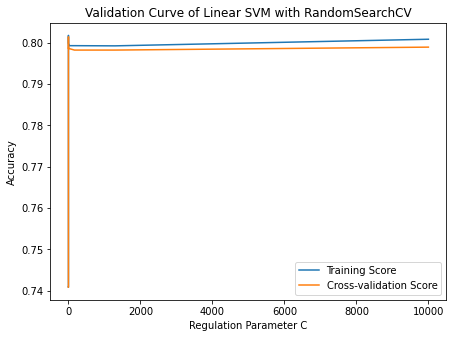

In [ ]:
plot_validation_curve(model_rand_svm_svc_lin_scale, "Linear SVM with RandomSearchCV")


Model: Linear SVM with RandomizedSearchCV - Best Estimator

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      4167
         Yes       0.66      0.50      0.57      1458

    accuracy                           0.80      5625
   macro avg       0.75      0.70      0.72      5625
weighted avg       0.79      0.80      0.79      5625


Cross-Validation Scores:
[0.79911111 0.78666667 0.80355556 0.80088889 0.81688889]

Accuracy:
- CV Mean: 0.8014
- CV Standard Deviation: 0.0097

Confusion Matrix:
[[3785  382]
 [ 729  729]]



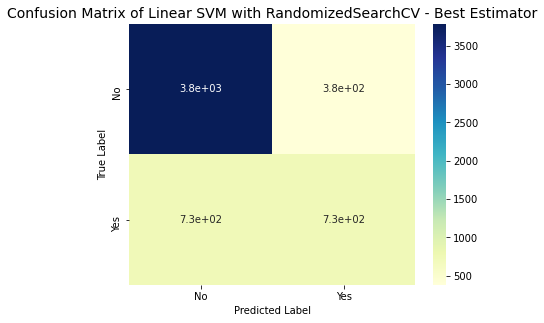


-----------------------------------------------------



In [ ]:
## The best RandomizedSearchCV model is model.best_estimator_, 
## use it to fit to data and print a classification report:
evaluate_model("Linear SVM with RandomizedSearchCV - Best Estimator", 
               model_rand_svm_svc_lin_scale.best_estimator_, 
               X_train_transformed_scaled, 
               y_train_transformed)


### <font color = 'blue'>Compare the best model with the standard model: </font>




Model: Standard SVM (default Gaussian RBF kernel)

              precision    recall  f1-score   support

          No       0.84      0.93      0.88      4167
         Yes       0.72      0.50      0.59      1458

    accuracy                           0.82      5625
   macro avg       0.78      0.71      0.73      5625
weighted avg       0.81      0.82      0.81      5625


Cross-Validation Scores:
[0.792      0.77955556 0.79911111 0.81422222 0.81422222]

Accuracy:
- CV Mean: 0.7998
- CV Standard Deviation: 0.0133

Confusion Matrix:
[[3879  288]
 [ 735  723]]



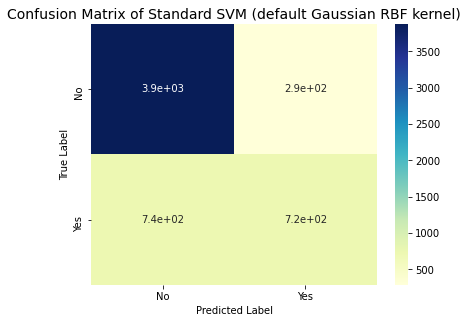


-----------------------------------------------------



In [ ]:
## Review the standard Linear SVM model performance:
evaluate_model("Standard SVM (default Gaussian RBF kernel)", 
               model_svm_svc_scale, 
               X_train_transformed_scaled, 
               y_train_transformed)


### <font color = 'blue'>***Findings:***</font>

<font color = 'blue'>*1. The best Linear Support Vector Machine model selected by applying GridSearchCV or RandomizedSearchCV doesn't make siginificant improvement on accuracy. The best Linear SVM model tuned by RandomizedSearchCV increases the Cross-Validation Accuracy from Standard SVM's rate at 0.7998 to 0.8014.*</font>

**Cross-Validation Accuracy:**
1.   ***Best SVM model turned by GridSearchCV/RandomizedCV (Kernel: Linear)***<br> - CV Mean: 0.8014<br> - Best Parameters: {'kernel': 'linear', 'C': 0.005994842503189409}
2.   ***Standard SVM model (Kernel: Gaussian RBF)***<br> - CV Mean: 0.7998<br> - Parameters: default {'C': 1.0, 'kernel': 'rbf'}



**Training Accuracy:**
1.   ***Best SVM model turned by GridSearchCV/RandomizedCV (Kernel: Linear)***<br> - Accuracy: 0.80<br> - Best Parameters: {'kernel': 'linear', 'C': 0.005994842503189409}
2.   ***Standard SVM model (Kernel: Gaussian RBF)***<br> - Accuracy: 0.82<br> - Parameters: default {'C': 1.0, 'kernel': 'rbf'}


<font color = 'blue'>2. *The regulation parameter C reaches an elbow point at 0.005994842503189409, giving the best performance based on Accuracy.*</font>

<font color = 'blue'>3. *GridSeachCV and RandomizedCV were implemeted with the same values of parameters to Linear SVM model. The results of two methods are identical. The run time of GridSearchCV and RandomizedSearchCV are very close -- they both take approximately 75 minutes to complete the full task. According to Scikit Learn documentation, "The result in parameter settings is quite similar, while the run time for randomized search is drastically lower." Surprisingly, in this experiment, RandomizedSearchCV even cost 0.5 more minute than GridSearchCV.*</font>



---






## <font color = 'blue'>c. Visualize the performance of kNN as a function of k.</font>

### <font color = 'blue'>Apply GridSearchCV to tune the parameter K of the k-Nearest Neighbors model:</font>

In [ ]:
## Choose a K value with an odd number to avoid a tie when the number of classes is even.
k_list = []

for i in range(1, 30, 2):
  k_list.append(i)

print("List of K values:", k_list)


## Find optimal regulation with GridSearchCV:
param_grid_knn = dict({"n_neighbors": k_list,
                       ## [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
                       "weights": ['uniform', 'distance'], 
                       "metric": ['minkowski', 'euclidean', 'manhattan']
                       })


List of K values: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


In [ ]:
## GridSearchCV Parameter: n_jobs = -1 means using all processors.
grid_knn_scale = GridSearchCV(estimator = model_knn_scale, 
                                 param_grid = param_grid_knn, 
                                 scoring = 'accuracy', 
                                 n_jobs = -1, cv = 5, verbose = 1, 
                                 return_train_score = True)


In [ ]:
model_grid_knn_scale = grid_knn_scale.fit(X_train_transformed_scaled, 
                                                y_train_transformed.ravel())


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  6.7min finished


### <font color = 'blue'>**Save & Load Model from file:**</font>

#### <font color = 'blue'>***Save trained model to the file in Google Drive using Pickle:***</font>

In [ ]:
pwd

'/content'

In [ ]:
import pickle

# from sklearn.externals import joblib

## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Save the model as .pkl file in the Drive:
pickle.dump(model_grid_knn_scale, open(file_path+'model_grid_knn_scale.pkl', 'wb'))


#### <font color = 'blue'>***Load the trained model from the file in Google Drive using Pickle:***</font>

In [ ]:
import pickle

## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Load the model as .pkl file from the Drive:
model_grid_knn_scale = pickle.load(open(file_path+'model_grid_knn_scale.pkl', 'rb'))


### <font color = 'blue'>Find the best model and evaluate the best estimator performance: </font>

In [ ]:
get_grid_rand_search_cv_results("KNN with GridSearchCV", model_grid_knn_scale)


Model: KNN with GridSearchCV

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}
Best Accuracy Score: 0.7904

-----------------------------------------------------




Model: KNN with GirdSearchCV - Best Estimator

              precision    recall  f1-score   support

          No       0.86      0.88      0.87      4167
         Yes       0.64      0.59      0.61      1458

    accuracy                           0.81      5625
   macro avg       0.75      0.74      0.74      5625
weighted avg       0.80      0.81      0.80      5625


Cross-Validation Scores:
[0.8        0.77333333 0.79555556 0.78488889 0.79822222]

Accuracy:
- CV Mean: 0.7904
- CV Standard Deviation: 0.0100

Confusion Matrix:
[[3686  481]
 [ 603  855]]



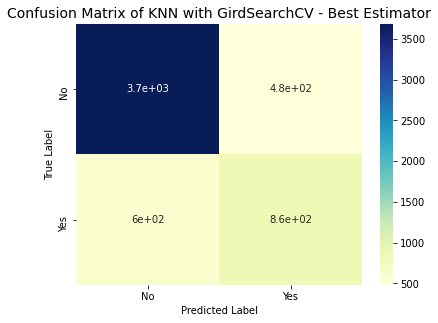


-----------------------------------------------------



In [ ]:
## The best GridSearchCV model is model.best_estimator_, 
## use it to fit to data and print a classification report:
evaluate_model("KNN with GirdSearchCV - Best Estimator", 
               model_grid_knn_scale.best_estimator_, 
               X_train_transformed_scaled, 
               y_train_transformed)


In [ ]:
# model_grid_knn_scale.cv_results_

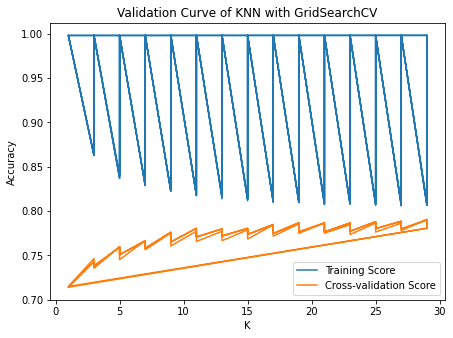

In [ ]:
## Define a function to plot the Validation Curve for KNN model through
## the Scikit Learn ValidationCurve model:
def plot_validation_curve_knn (model, name):
  # from sklearn.model_selection import validation_curve

  ## Define the parameter for x-axis:
  ## model.cv_results_['param_n_neighbors'] returns a Numpy Masked Array.
  ## To access the data of param_n_neighbors values, use ma.data to get a list:
  param_range = model.cv_results_['param_n_neighbors'].data
  # ## Or use compressed() with a ma (Masked Array).
  # param_range = model.cv_results_['param_n_neighbors'].compressed()
  # print(param_range)
  # param_range.shape

  ## Define the parameter for y-axis:
  mean_train_score_arr = model.cv_results_['mean_train_score']
  mean_test_score_arr = model.cv_results_['mean_test_score']
  std_train_score_arr = model.cv_results_['std_train_score']
  std_test_score_arr = model.cv_results_['std_test_score']
  ## test_score is actually the Validation Score for the training dataset.



  ## Plot the validation Curve:
  plt.figure()
  ## Plot mean accuracy scores for training and validation sets:
  plt.plot(param_range, mean_train_score_arr, label = "Training Score")
  plt.plot(param_range, mean_test_score_arr, label = "Cross-validation Score")

  # ## Plot accurancy bands for training and validation sets:
  # plt.fill_between(param_range, mean_train_score_arr - std_train_score_arr, 
  #                  mean_train_score_arr + std_train_score_arr, color = "gray")
  # plt.fill_between(param_range, mean_test_score_arr - std_test_score_arr, 
  #                  mean_test_score_arr + std_test_score_arr, color = "gainsboro")

  ## Create plot:
  plt.title("Validation Curve of " + name)
  plt.xlabel("K")
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.legend(loc = "best")
  ## Default legend Parameter: loc : str or pair of floats, 
  ## default: rcParams["legend.loc"] = 'best' ('best' for axes, 'upper right' for figures)
  plt.rcParams['figure.figsize'] = (6.4, 4.8)

  plt.show()


## Call the validation curve visualiation function for KNN:
plot_validation_curve_knn(model_grid_knn_scale, "KNN with GridSearchCV")



### <font color = 'blue'>Compare the best model with the standard model: </font>


Model: Standard KNN

              precision    recall  f1-score   support

          No       0.88      0.90      0.89      4167
         Yes       0.70      0.64      0.67      1458

    accuracy                           0.83      5625
   macro avg       0.79      0.77      0.78      5625
weighted avg       0.83      0.83      0.83      5625


Cross-Validation Scores:
[0.77066667 0.752      0.74666667 0.76888889 0.76      ]

Accuracy:
- CV Mean: 0.7596
- CV Standard Deviation: 0.0093

Confusion Matrix:
[[3765  402]
 [ 528  930]]



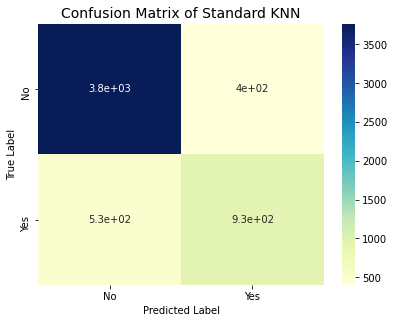


-----------------------------------------------------



In [ ]:
## Review the standard KNN model performance:
evaluate_model("Standard KNN", 
               model_knn_scale, 
               X_train_transformed_scaled, 
               y_train_transformed)


### <font color = 'blue'>***Findings:***</font>

<font color = 'blue'>*1. The best K-Nearest Neighbors model selected by applying GridSearchCV improved the the Cross-Validation Accuracy from 0.7596 to 0.7904.*</font>

<font color = 'blue'>2. *The best parameter K ('n_neighbors') is K = 29 in the range of defined K list. Other best parameters are 'metric': 'manhattan' and 'weights': 'uniform'.*</font>

**Cross-Validation Accuracy:**
1.   ***Best KNN model turned by GridSearchCV***<br> - CV Mean: 0.7904<br> - Best Parameters: {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}
2.   ***Standard KNN model***<br> - CV Mean: 0.7596<br> - Parameters: default {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}

**Training Accuracy:**
1.   ***Best KNN model turned by GridSearchCV***<br> - Accuracy: 0.81<br> - Best Parameters: {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}
2.   ***Standard KNN model***<br> - Accuracy: 0.83<br> - Parameters: default {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}




---






## <font color = 'blue'>d. Use RandomSearchCV to tune the decision tree model with max_depth, max_leaf_nodes, min_samples_split, min_samples_leaf, and min_weight_fraction_leaf.</font>

In [ ]:
# np.linspace(10, 110, num = 11)

In [ ]:
# random.randint(1, 10)

### <font color = 'blue'>Apply RandomizedSearchCV:</font>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
## Find optimal regulation with RandomizedSearchCV:

param_dist = dict({"criterion": ['gini', 'entropy'], 
                   "max_depth": [np.linspace(5, 110, num = 50), None],   
                   "min_samples_split": [2, 5, 8, 10], 
                   "min_samples_leaf": [1, 2, 4, 8], 
                   "min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.5, 0.7, 1.0],
                   "max_leaf_nodes": [3, None]
                   })


In [ ]:
## RandomizedSearchCV Parameter: n_jobs = -1 means using all processors.
rand_decTree_scale = RandomizedSearchCV(estimator = model_decTree_scale, 
                                 param_distributions = param_dist, 
                                 scoring = 'accuracy', 
                                 n_jobs = -1, cv = 5, verbose = 1, 
                                 return_train_score = True)

In [ ]:
# Fit RandomizedCV model to the training data:
model_rand_decTree_scale = rand_decTree_scale.fit(X_train_transformed_scaled, 
                                                y_train_transformed.ravel())


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished


### <font color = 'blue'>**Save & Load Model from file:**</font>

#### <font color = 'blue'>***Save trained model to the file in Google Drive using Pickle:***</font>

In [ ]:
pwd

'/content'

In [ ]:
import pickle

# from sklearn.externals import joblib

## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Save the model as .pkl file in the Drive:
pickle.dump(model_rand_decTree_scale, open(file_path+'model_rand_decTree_scale.pkl', 'wb'))


#### <font color = 'blue'>***Load the trained model from the file in Google Drive using Pickle:***</font>

In [ ]:
import pickle

## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Load the model as .pkl file from the Drive:
model_rand_decTree_scale = pickle.load(open(file_path+'model_rand_decTree_scale.pkl', 'rb'))


### <font color = 'blue'>Find the best model and evaluate the best estimator performance: </font>

In [ ]:
get_grid_rand_search_cv_results("Decision Tree with RandomizedSearchCV", 
                                model_rand_decTree_scale)



Model: Decision Tree with RandomizedSearchCV

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.1, presort='deprecated',
                       random_state=None, splitter='best')
Best Parameters: {'min_weight_fraction_leaf': 0.1, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_leaf_nodes': None, 'max_depth': None, 'criterion': 'gini'}
Best Accuracy Score: 0.7888

-----------------------------------------------------




Model: Decision Tree with RandomizedSearchCV - Best Estimator

              precision    recall  f1-score   support

          No       0.81      0.94      0.87      4167
         Yes       0.68      0.36      0.47      1458

    accuracy                           0.79      5625
   macro avg       0.74      0.65      0.67      5625
weighted avg       0.78      0.79      0.77      5625


Cross-Validation Scores:
[0.78222222 0.77688889 0.79466667 0.79288889 0.79733333]

Accuracy:
- CV Mean: 0.7888
- CV Standard Deviation: 0.0079

Confusion Matrix:
[[3919  248]
 [ 929  529]]



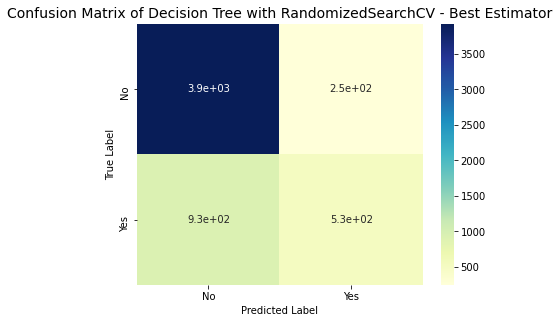


-----------------------------------------------------



In [ ]:
## The best RandomizedSearchCV model is model.best_estimator_, 
## use it to fit to data and print a classification report:
evaluate_model("Decision Tree with RandomizedSearchCV - Best Estimator", 
               model_rand_decTree_scale.best_estimator_, 
               X_train_transformed_scaled, 
               y_train_transformed)


### <font color = 'blue'>Compare the best model with the standard model: </font>


Model: Standard Desicison Tree

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      4167
         Yes       1.00      0.99      1.00      1458

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625


Cross-Validation Scores:
[0.72355556 0.73422222 0.73511111 0.72088889 0.72622222]

Accuracy:
- CV Mean: 0.7280
- CV Standard Deviation: 0.0057

Confusion Matrix:
[[4166    1]
 [  12 1446]]



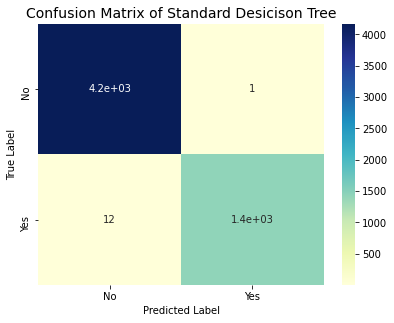


-----------------------------------------------------



In [ ]:
## Review the performance of the standard Decision Tree model trained in Q2:
evaluate_model("Standard Desicison Tree", 
               model_decTree_scale, 
               X_train_transformed_scaled, 
               y_train_transformed)


### <font color = 'blue'>***Findings:***</font>

<font color = 'blue'>*1. The best Decision Tree model chosen by RandomizedSearchCV boosts the Cross-Validation Accuracy from 0.7280 to 0.7888.*</font>

<font color = 'blue'>2. *The best Decision Tree model tuned by RandomizedSearchCV also resolves the overfitting issue of the standard model. The Precison, Recall, F1, and Traning Accuracy are all decreased from 1.00 by some degree, which is fair to the reality. The best model also results in almost the same Training Accuracy and Cross-Validation Accuracy at 79%.*</font>

**Cross-Validation Accuracy:**
1.   ***Best Decision Tree model turned by RandomizedSearchCV***<br> - CV Mean: 0.7888<br> - Best Parameters: {'min_weight_fraction_leaf': 0.1, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_leaf_nodes': None, 'max_depth': None, 'criterion': 'gini'}
2.   ***Standard Decision Tree model***<br> - CV Mean: 0.7280<br> - Parameters: default (criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

**Training Accuracy:**
1.   ***Best Decision Tree model turned by RandomizedSearchCV***<br> - Accuracy: 0.79<br> - Best Parameters: {'min_weight_fraction_leaf': 0.1, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_leaf_nodes': None, 'max_depth': None, 'criterion': 'gini'}
2.   ***Standard Decision Tree model***<br> - Accuracy: 1<br> - Parameters: default (criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)



---






# <font color = 'blue'>**Question 4**</font>
**4. Is polynomial kernel and Gaussian RBF kernel helpful for improving the performance of the SVM model?**

### <font color = 'blue'>Apply GridSearchCV to tune the regularization parameter C and the kernel between polynomial and Gaussian RBF of the SVM model:</font>

In [ ]:
## Find optimal regulation with GridSearchCV:

param_grid_svm_svc = dict({"C": np.logspace(-4, 4, 10), 
                               "kernel": ['poly', 'rbf']
                               })


In [ ]:
## GridSearchCV Parameter: n_jobs = -1 means using all processors.
grid_svm_svc_scale = GridSearchCV(estimator = model_svm_svc_scale, 
                                 param_grid = param_grid_svm_svc, 
                                 scoring = 'accuracy', 
                                 n_jobs = -1, cv = 5, verbose = 1, 
                                 return_train_score = True)


<font color = 'red'>++++++++++++++++++++++++++++++++

DO NOT RERUN THIS BLOCK OF CODE EVERYTIME. It costs 0.5 hour to complete.</font>

In [ ]:
## This model takes 30.5 min to be finished!!
model_grid_svm_svc_scale = grid_svm_svc_scale.fit(X_train_transformed_scaled, 
                                                y_train_transformed.ravel())


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 30.5min finished


<font color = 'red'>++++++++++++++++++++++++++++++++</font>

### <font color = 'blue'>**Save & Load Model from file:**</font>

#### <font color = 'blue'>***Save trained model to the file in Google Drive using Pickle:***</font>

In [ ]:
pwd

'/content'

In [ ]:
import pickle

# from sklearn.externals import joblib

## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Save the model as .pkl file in the Drive:
pickle.dump(model_grid_svm_svc_scale, open(file_path+'model_grid_svm_svc_scale.pkl', 'wb'))


#### <font color = 'blue'>***Load the trained model from the file in Google Drive using Pickle:***</font>

In [ ]:
import pickle

## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Load the model as .pkl file from the Drive:
model_grid_svm_svc_scale = pickle.load(open(file_path+'model_grid_svm_svc_scale.pkl', 'rb'))


### <font color = 'blue'>Find the best model and evaluate the best estimator performance: </font>

In [ ]:
get_grid_rand_search_cv_results("SVM (Polynomial vs Gaussian RBF Kernel) with GridSearchCV", 
                                model_grid_svm_svc_scale)



Model: SVM (Polynomial vs Gaussian RBF Kernel) with GridSearchCV

SVC(C=0.3593813663804626, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Best Parameters: {'C': 0.3593813663804626, 'kernel': 'poly'}
Best Accuracy Score: 0.7994666666666668

-----------------------------------------------------



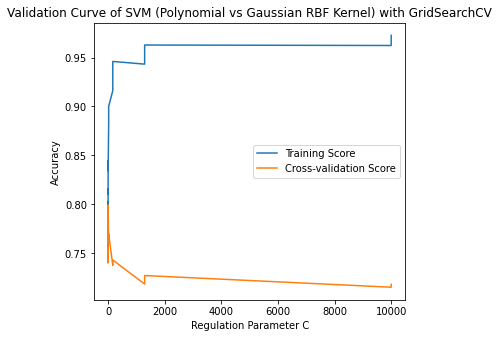

In [ ]:
plot_validation_curve(model_grid_svm_svc_scale, 
                      "SVM (Polynomial vs Gaussian RBF Kernel) with GridSearchCV")



Model: SVM (Polynomial vs Gaussian RBF Kernel) with GridSearchCV - Best Estimator

              precision    recall  f1-score   support

          No       0.84      0.93      0.88      4167
         Yes       0.71      0.48      0.57      1458

    accuracy                           0.81      5625
   macro avg       0.77      0.70      0.73      5625
weighted avg       0.80      0.81      0.80      5625


Cross-Validation Scores:
[0.79377778 0.78044444 0.79644444 0.81333333 0.81333333]

Accuracy:
- CV Mean: 0.7995
- CV Standard Deviation: 0.0126

Confusion Matrix:
[[3886  281]
 [ 763  695]]



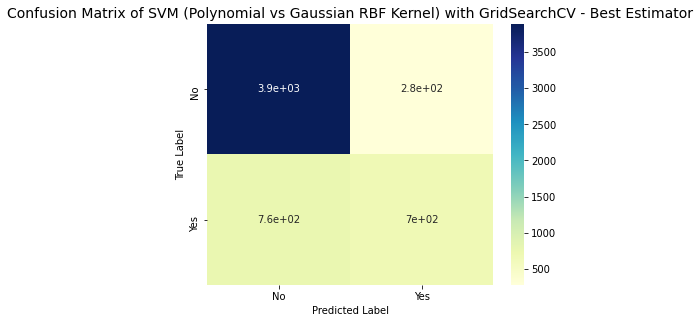


-----------------------------------------------------



In [ ]:
## The best GridCV model is model.best_estimator_, 
## use it to fit to data and print a classification report:
evaluate_model("SVM (Polynomial vs Gaussian RBF Kernel) with GridSearchCV - Best Estimator", 
               model_grid_svm_svc_scale.best_estimator_, 
               X_train_transformed_scaled, 
               y_train_transformed)


### <font color = 'blue'>Compare the best model with the standard model: </font>

In [ ]:
## Use the following block of code to load the saved models from my Google Drive folder:


import pickle

## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Load the model as .pkl file from the Drive:
model_grid_svm_svc_lin_scale = pickle.load(open(file_path+'model_grid_svm_svc_lin_scale.pkl', 'rb'))



Model: Linear SVM with GridSearchCV - Best Estimator

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      4167
         Yes       0.66      0.50      0.57      1458

    accuracy                           0.80      5625
   macro avg       0.75      0.70      0.72      5625
weighted avg       0.79      0.80      0.79      5625


Cross-Validation Scores:
[0.79911111 0.78666667 0.80355556 0.80088889 0.81688889]

Accuracy:
- CV Mean: 0.8014
- CV Standard Deviation: 0.0097

Confusion Matrix:
[[3785  382]
 [ 729  729]]



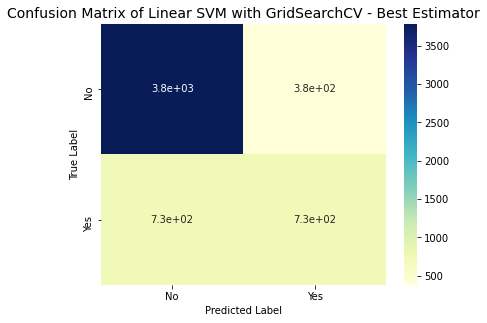


-----------------------------------------------------



In [ ]:
## Review the performance of the best Linear SVM model trained in Q3:

## The best GridSearchCV model is model.best_estimator_, 
## use it to fit to data and print a classification report:
evaluate_model("Linear SVM with GridSearchCV - Best Estimator", 
               model_grid_svm_svc_lin_scale.best_estimator_, 
               X_train_transformed_scaled, 
               y_train_transformed)



Model: Standard SVM (default Gaussian RBF kernel)

              precision    recall  f1-score   support

          No       0.84      0.93      0.88      4167
         Yes       0.72      0.50      0.59      1458

    accuracy                           0.82      5625
   macro avg       0.78      0.71      0.73      5625
weighted avg       0.81      0.82      0.81      5625


Cross-Validation Scores:
[0.792      0.77955556 0.79911111 0.81422222 0.81422222]

Accuracy:
- CV Mean: 0.7998
- CV Standard Deviation: 0.0133

Confusion Matrix:
[[3879  288]
 [ 735  723]]



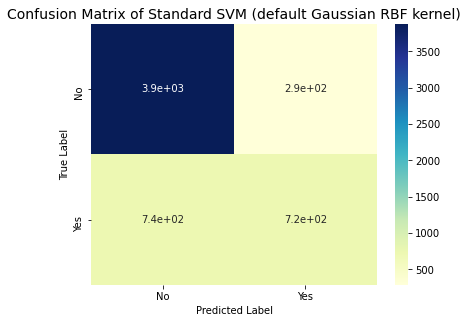


-----------------------------------------------------



In [ ]:
## Review the performance of the standard SVM model from trained in Q2:
evaluate_model("Standard SVM (default Gaussian RBF kernel)", model_svm_svc_scale, 
               X_train_transformed_scaled, y_train_transformed)


### <font color = 'blue'>***Findings:***</font>

<font color = 'blue'>*1. After turning parameters among Polynomial and Gaussian RBF kernels paird with the same C values used in Q3, GridSearchCV gives the best estimator of SVM models that achieves the Cross-Validation Accuracy at 0.7995. The score is lower that neither the best Linear SVM model tuned by GridSearchCV/RandomizedSearchCV nor the standard SVM model.*</font>

**Cross-Validation Accuracy:**
1.   ***Best SVM model turned by GridSearchCV/RandomizedCV (Kernel: Linear)***<br> - CV Mean: 0.8014<br> - Best Parameters: {'kernel': 'linear', 'C': 0.005994842503189409}
2.   ***Standard SVM model (Kernel: Gaussian RBF)***<br> - CV Mean: 0.7998<br> - Parameters: default {'C': 1.0, 'kernel': 'rbf'}
3.   ***Best SVM model turned by GridSearchCV (Kernel: Polynomial)***<br> - CV Mean: 0.7995<br> - Best Parameters: {'C': 0.3593813663804626, 'kernel': 'poly'}


**Training Accuracy:**
1.   ***Best SVM model turned by GridSearchCV/RandomizedCV (Kernel: Linear)***<br> - Accuracy: 0.80<br> - Best Parameters: {'kernel': 'linear', 'C': 0.005994842503189409}
2.   ***Standard SVM model (Kernel: Gaussian RBF)***<br> - Accuracy: 0.82<br> - Parameters: default {'C': 1.0, 'kernel': 'rbf'}
3.   ***Best SVM model turned by GridSearchCV (Kernel: Polynomial)***<br> - Accuracy: 0.81<br> - Best Parameters: {'C': 0.3593813663804626, 'kernel': 'poly'}



<font color = 'blue'>2. *Based on the Accuracy rates of three SVM models, we can conclude that the best model resulted from tuning polynomial kernel and Gaussian RBF kernel dosen't improve the performance from either the stand or previous turned Liner SVM model.*</font>

<font color = 'blue'>3. *The tuned Linear SVM model has the most close accuracy rates betwee training and cross-validation results. It's the best estimator among the three SVM models that have been developed so far.*</font>




---






# <font color = 'blue'>**Question 5**</font>
**5. Choose the best model by analyzing the accuracy, precision, recall, ROC curve, and auc score (see https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5).**

## Q5 Functions:

In [ ]:
### Q5 Functions:

def get_model_scores (name, model, X, y):
  y_pred = model.predict(X)

  score_accuracy = metrics.accuracy_score(y, y_pred)
  score_precision = metrics.precision_score(y, y_pred)
  score_recall = metrics.recall_score(y, y_pred)
  score_f1 = metrics.f1_score(y, y_pred)


  ## Compute the AUC score:

  ## SVM Models were trained as the parameter set with probability=False.
  ## predict_proba is not available when  probability=False
  svmModels = [model_svm_svc_scale, 
               model_grid_svm_svc_lin_scale.best_estimator_, 
               model_grid_svm_svc_scale.best_estimator_
               ]

  if model in svmModels:
    ## Compute y_score by clf.decision_function for the Scikit Learn roc_auc_score module:
    y_score = model.decision_function(X)
    ## Some classsifier (i.e.,'KNeighborsClassifier') have no attribute 'decision_function'.
  else:
    ## Compute y_score by getting the prediction probabilities and keep only the values of the Postive class:
    y_score = model.predict_proba(X)[:, 1]
    
  ## Compute the AUC score using roc_auc_score(y_true, y_scores):
  score_auc = metrics.roc_auc_score(y, y_score)


  ## Compute Cross-Validation scores:
  score_cv_mean_accuracy = cross_val_score(model, X, y.ravel(), scoring = 'accuracy').mean()
  score_cv_mean_precision = cross_val_score(model, X, y.ravel(), scoring = 'precision').mean()
  score_cv_mean_recall = cross_val_score(model, X, y.ravel(), scoring = 'recall').mean()
  score_cv_mean_f1 = cross_val_score(model, X, y.ravel(), scoring = 'f1').mean()
  score_cv_mean_auc = cross_val_score(model, X, y.ravel(), scoring = 'roc_auc').mean()


  return {'name': name, 
          'accuracy': score_accuracy,
          'precision': score_precision,
          'recall': score_recall,
          'f1': score_f1,   
          'auc': score_auc,  
          'cv_mean_accuracy': score_cv_mean_accuracy,
          'cv_mean_precision': score_cv_mean_precision,
          'cv_mean_recall': score_cv_mean_recall,
          'cv_mean_f1': score_cv_mean_f1,
          'cv_mean_auc': score_cv_mean_auc
          }


## Validate & Test the functions:

In [ ]:
temp1 = get_model_scores("SVM", 
                        model_grid_svm_svc_lin_scale.best_estimator_,
                        X_train_transformed_scaled, 
                        y_train_transformed
                        )

temp1

{'accuracy': 0.8024888888888889,
 'auc': 0.8334399091694064,
 'cv_mean_accuracy': 0.8014222222222221,
 'cv_mean_auc': 0.8317041773849887,
 'cv_mean_f1': 0.5650354627320244,
 'cv_mean_precision': 0.6549911203494277,
 'cv_mean_recall': 0.49725556653956604,
 'f1': 0.5675360062281044,
 'name': 'SVM',
 'precision': 0.6561656165616562,
 'recall': 0.5}

In [ ]:
temp1['f1']

0.5675360062281044

In [ ]:
temp2 = get_model_scores("KNN", 
                        model_grid_knn_scale.best_estimator_,
                        X_train_transformed_scaled, 
                        y_train_transformed
                        )

temp2

{'accuracy': 0.8072888888888888,
 'auc': 0.8538559713576824,
 'cv_mean_accuracy': 0.7904,
 'cv_mean_auc': 0.8261178059883034,
 'cv_mean_f1': 0.5776498260411176,
 'cv_mean_precision': 0.6044354162178276,
 'cv_mean_recall': 0.5534787930141694,
 'f1': 0.6120257695060844,
 'name': 'KNN',
 'precision': 0.6399700598802395,
 'recall': 0.5864197530864198}

In [ ]:
len(temp1.values())

10

In [ ]:

temp_master = []

temps = [temp1, temp2]


for t in temps:
  # temp_row.append(t.values())
  temp_row = []

  for s in t.values():
    # print(s)
    
  #   print()
  # print("---------")
    temp_row.append(s)

    ## The values are appended followed the order defined in the get_model_scores function.
  temp_master.append(temp_row)

# print(temp_row)
temp_master


[['SVM',
  0.8024888888888889,
  0.6561656165616562,
  0.5,
  0.5675360062281044,
  0.8334399091694064,
  0.8014222222222221,
  0.6549911203494277,
  0.49725556653956604,
  0.5650354627320244,
  0.8317041773849887],
 ['KNN',
  0.8072888888888888,
  0.6399700598802395,
  0.5864197530864198,
  0.6120257695060844,
  0.8538559713576824,
  0.7904,
  0.6044354162178276,
  0.5534787930141694,
  0.5776498260411176,
  0.8261178059883034]]

In [ ]:
## Compute y_score by clf.decision_function for the Scikit Learn roc_auc_score module:
model_logReg_scale.decision_function(X_train_transformed_scaled)

array([ 1.23997258, -0.55783138, -2.98756318, ..., -1.50615603,
       -0.88308951, -0.43188191])

In [ ]:
model_logReg_scale.predict_proba(X_train_transformed_scaled)

array([[0.22444076, 0.77555924],
       [0.63595062, 0.36404938],
       [0.9520091 , 0.0479909 ],
       ...,
       [0.81849083, 0.18150917],
       [0.70746204, 0.29253796],
       [0.60632296, 0.39367704]])

In [ ]:
## Compute the AUC score using roc_auc_score(y_true, y_scores):
metrics.roc_auc_score(y_train_transformed, 
                      model_logReg_scale.predict_proba(X_train_transformed_scaled)[:, 1])

0.8444052870832062

In [ ]:
## Compute the AUC score using roc_auc_score(y_true, y_scores):
metrics.roc_auc_score(y_train_transformed, 
                      model_logReg_scale.decision_function(X_train_transformed_scaled))

0.8444052870832062

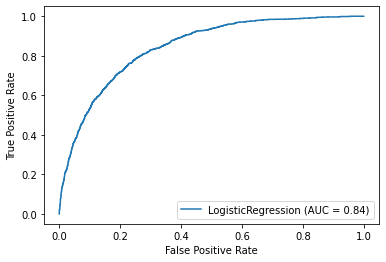

In [ ]:
metrics.plot_roc_curve(model_logReg_scale, X_train_transformed_scaled, y_train_transformed)

## <font color = 'blue'>Generate a report of all metrics for all trained models:</font>

In [ ]:
## Create a list of all models trained with scaled data with StandardScaler:
models_scaled = [model_logReg_scale, 
                 model_svm_svc_scale, 
                 model_knn_scale, 
                 model_decTree_scale, 
                 model_grid_logReg_scale.best_estimator_, 
                 model_grid_svm_svc_lin_scale.best_estimator_, 
                 model_grid_svm_svc_scale.best_estimator_, 
                 model_grid_knn_scale.best_estimator_, 
                 model_rand_decTree_scale.best_estimator_
                 ]

## Create a list of all scaled model names according to the order above:
modelNames_scaled = ["Standard Logistic Regression", 
                     "Standard SVM", 
                     "Standard KNN", 
                     "Standard Decision Tree", 
                     "Logistic Regression (GridSearchCV - best)",
                     "Linear SVM (GridSearchCV - best)", 
                     "Polynomial SVM (GridSearchCV - best)", 
                     "KNN (GridSearchCV - best)", 
                     "Decision Tree (RandomizedSearchCV - best)"
                     ]


In [ ]:
# ## Initial arrays of scores:
# accuary_arr = []
# precision_arr = []
# recall_arr = []
# f1_arr = []
# cv_mean_accuracy_arr = []
# cv_mean_precision_arr = []
# cv_mean_recall_arr = []
# cv_mean_f1_arr = []
# auc_arr = []


In [ ]:
len(models_scaled)

9

In [ ]:
len(modelNames_scaled)

9

In [ ]:
# for i in range(len(models_scaled)):
#   print(i)

In [ ]:
# row1 = [1, 2, 3]
# row2 = ["a", "b", "c"]
# row3 = []
# row3.append(row1)
# row3.append(row2)
# row3

In [ ]:
## Initialize an empty array for evalation results:
evaluationResults = []


for i in range(len(models_scaled)):
  ## Return the model name from the list modelNames_scaled by index i:
  name  = modelNames_scaled[i]
  ## Compute all scores of the model by order based on the index of the list of models:
  scores = get_model_scores(name, models_scaled[i], X_train_transformed_scaled, y_train_transformed)

  ## Initilize a emapty list to store all dict value of each model:
  row = []
  ## Store all dict value from the computed scores to the row list by loop:
  for s in scores.values():
    ## Append each score to a row:
    row.append(s)
    ## The values are appended followed the order defined in the get_model_scores function.
    
  ## Append the row of scores of each model to a master array of all model scores:
  evaluationResults.append(row)

evaluationResults



[['Standard Logistic Regression',
  0.8042666666666667,
  0.6476426799007444,
  0.5370370370370371,
  0.5871766029246345,
  0.8444052870832062,
  0.8028444444444445,
  0.6472395704948809,
  0.5301652308995904,
  0.5824558947323208,
  0.8411414966812794],
 ['Standard SVM',
  0.8181333333333334,
  0.7151335311572701,
  0.49588477366255146,
  0.5856622114216282,
  0.860238423724456,
  0.7998222222222221,
  0.6673315547654093,
  0.45544650002353715,
  0.5410892420546657,
  0.7930834350682291],
 ['Standard KNN',
  0.8346666666666667,
  0.6981981981981982,
  0.6378600823045267,
  0.6666666666666666,
  0.8994854897204931,
  0.7596444444444443,
  0.5376848875923479,
  0.5212658287435861,
  0.5291846546888669,
  0.7758159231583199],
 ['Standard Decision Tree',
  0.9976888888888888,
  0.9993089149965446,
  0.9917695473251029,
  0.9955249569707402,
  0.9999859270517618,
  0.7308444444444444,
  0.48230134492344534,
  0.5033987666525443,
  0.4899715852044813,
  0.6540914225162691],
 ['Logistic Regr

In [ ]:
len(evaluationResults)

9

In [ ]:
## Create a list of column name for a new metric report dataframe based on the order of 
## score values defined in the function get_model_scores():
report_colNames = ["name", "accuracy", "precision", "recall", "f1", "auc", 
                    "cv_mean_accuracy", "cv_mean_precision", 
                    "cv_mean_recall", "cv_mean_f1", "cv_mean_auc"]


In [ ]:
## Create a new evaluation report dataframe for all model metrics:
model_evaluation_report_df = pd.DataFrame(data = evaluationResults, 
                                    columns = report_colNames)

## Display the evaluation report:
display(model_evaluation_report_df)


,name,accuracy,precision,recall,f1,auc,cv_mean_accuracy,cv_mean_precision,cv_mean_recall,cv_mean_f1,cv_mean_auc
0,Standard Logistic Regression,0.804267,0.647643,0.537037,0.587177,0.844405,0.802844,0.647240,0.530165,0.582456,0.841141
1,Standard SVM,0.818133,0.715134,0.495885,0.585662,0.860238,0.799822,0.667332,0.455447,0.541089,0.793083
2,Standard KNN,0.834667,0.698198,0.637860,0.666667,0.899485,0.759644,0.537685,0.521266,0.529185,0.775816
3,Standard Decision Tree,0.997689,0.999309,0.991770,0.995525,0.999986,0.730844,0.482301,0.503399,0.489972,0.654091
4,Logistic Regression (GridSearchCV - best),0.805511,0.649918,0.541152,0.590569,0.844598,0.803911,0.647727,0.537029,0.586899,0.841209
5,Linear SVM (GridSearchCV - best),0.802489,0.656166,0.500000,0.567536,0.833440,0.801422,0.654991,0.497256,0.565035,0.831704
6,Polynomial SVM (GridSearchCV - best),0.814400,0.712090,0.476680,0.571076,0.851529,0.799467,0.671511,0.444471,0.534433,0.798677
7,KNN (GridSearchCV - best),0.807289,0.639970,0.586420,0.612026,0.853856,0.790400,0.604435,0.553479,0.577650,0.826118
8,Decision Tree (RandomizedSearchCV - best),0.790756,0.680824,0.362826,0.473378,0.817388,0.788800,0.673156,0.360773,0.469670,0.812954


### <font color = 'blue'>**Save Panda Dataframe to file in Google Drive:**</font>

In [ ]:
## Define the file path:
file_path = '/content/drive/My Drive/Colab Notebooks_Dev/CSC 74020 - Machine Learning_Code/ML_customer-churn_models/'

## Save the dataframe to csv file in Google Drive file path:
model_evaluation_report_df.to_csv(file_path+'model_evaluation_report_df.csv')


### <font color = 'blue'>Find the best model by evaluating all metrics of model performance: </font>

In [ ]:
## Find the highest scores of each metrics:

print("The highest scores among all models:")
print()
## Select all rows and eliminate the 0th column of model names:
print(model_evaluation_report_df.iloc[:, 1:].max())


The highest scores among all models:

accuracy             0.997689
precision            0.999309
recall               0.991770
f1                   0.995525
auc                  0.999986
cv_mean_accuracy     0.803911
cv_mean_precision    0.673156
cv_mean_recall       0.553479
cv_mean_f1           0.586899
cv_mean_auc          0.841209
dtype: float64


In [ ]:
## Find the row index of each highest score:

print("The row index of the highest scores among all models:")
print()
## Select all rows and eliminate the 0th column of model names:
print(model_evaluation_report_df.iloc[:, 1:].idxmax())


The row index of the highest scores among all models:

accuracy             3
precision            3
recall               3
f1                   3
auc                  3
cv_mean_accuracy     4
cv_mean_precision    8
cv_mean_recall       7
cv_mean_f1           4
cv_mean_auc          4
dtype: int64


### <font color = 'blue'>Visualize the ROC Curve of each model: </font>

ROC Curves of All Models:



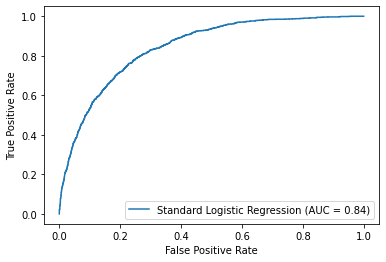

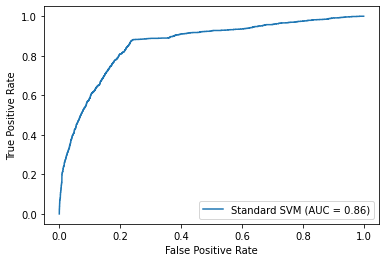

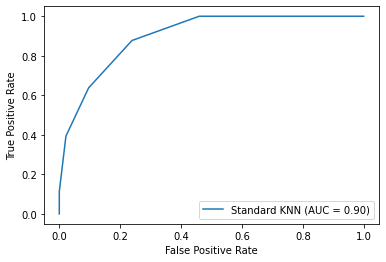

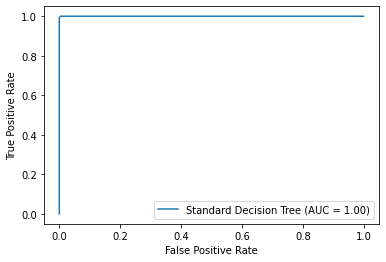

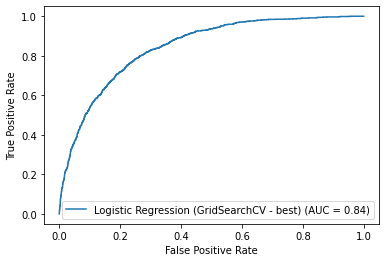

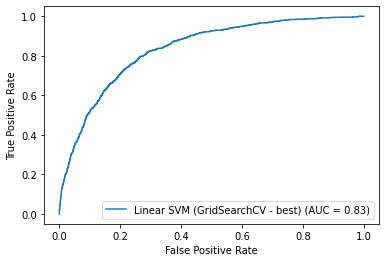

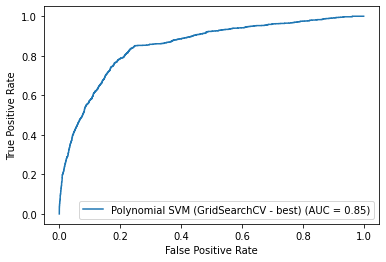

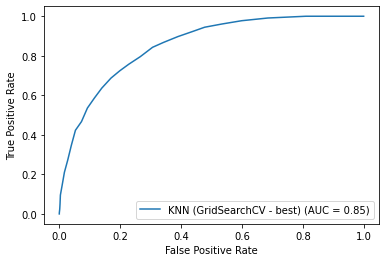

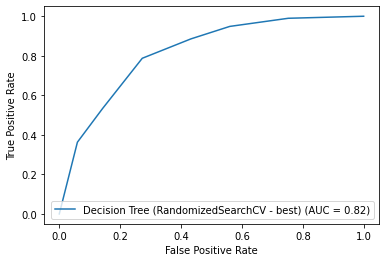

In [ ]:
print("ROC Curves of All Models:")
print()

for i in range(len(models_scaled)):
  metrics.plot_roc_curve(models_scaled[i], X_train_transformed_scaled, y_train_transformed, 
                         name = modelNames_scaled[i])


## <font color = 'blue'>***Findings & Best Model Overall:***</font>

<font color = 'blue'>*Customer churn means an existing customer stop doing business with the company or services. Minimizing the customer churn is crucial to a business as it helps the company or service save its current customer, and therefore, generate revenue and strengthen customer loyalty. In this business scenario, our main goal is to predict if a customer would churn based on a frame of charateristics.*</font>
<br><br>

*   True-Positive (TP): Actual Churn is identified as Churn
*   False-Positive (FP): Actual Non-Churn is identified as Churn
*   True-Negative (TN): Actual Non-Churn is identified as No-Churn
*   **False-Negative (FN): Actual Churn is identified as Non-Churn**


<font color = 'blue'>*FN is more important than FP to our goal as misclassifying some actual churn customer as non-churn could nelegate the importance of customer value and lead to financial loss and hurt the brand. **The model for customer churn detection has a high cost associated with FN.** Thus, **Recall** is a critical metric to evaluate the models.*</font>
<br><br>

<font color = 'blue'>*The proportion of two classes/labels that our dataset contains is **imbalanced** -- the number of negative class of Non-Churn customer is almost three times of the positive class of Churn customer. **F1 Score** can help balance the Precison and Recall for evaluating the model.*</font>
<br><br>

<font color = 'blue'>**Best Model by Single Metric:**</font>

**Traing Scores:**
*   **accuracy**: Standard Decision Tree
*   **precision**: Standard Decision Tree
*   **recall**: Standard Decision Tree
*   **f1**: Standard Decision Tree
*   **auc**: Standard Decision Tree

**Cross-Validation Scores:**
*   **cv_mean_accuracy**: Logistic Regression (GridSearchCV - best)
*   **cv_mean_precision**: Decision Tree (RandomizedSearchCV - best)
*   **cv_mean_recall**: KNN (GridSearchCV - best)
*   **cv_mean_f1**: Logistic Regression (GridSearchCV - best)
*   **cv_mean_auc**: Logistic Regression (GridSearchCV - best)
<br><br>

<font color = 'blue'>**Best Model Overall:**</font>
*   <font color = 'blue'>***Logistic Regression (GridSearchCV - best)***
    - *Highest scores on cv_mean_accuracy, cv_mean_f1, and cv_mean_auc, as well as the second highest on cv_mean_recall.*</font>


---













# <font color = 'blue'>**Question 6**</font>
**6. Which types of customers are less likely to end the service?**

## Q6 Functions:

In [ ]:
### Q6 Functions (Prediction & Evaluation Part):

## Define a function to evaluate the performance of any model on test data:
def evaluate_model_prediction (name, model, X_test, y_test):

  ## Make predictions on the test data:
  y_pred = model.predict(X_test)

  ## Print the evaluation metrics:
  print()
  print("Model: " + name)
  print()
  print("R^2 Score:", metrics.r2_score(y_test, y_pred))
  print("Mean Absoult Error:", metrics.mean_absolute_error(y_test, y_pred))
  print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
  print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print()

  ## Construct a dataframe for comparison and display the results:
  actual_pred_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
  print("Predictions on The Target Variable:")
  print()
  display(actual_pred_results.head(5))
  print()
  print("--------------------------------------")
  print()


  

## <font color = 'blue'>NEW FIX: Reconnect the transformed data after OneHotEncoder back with original column name info, and then visualize coefficients by the new column names (feature_category) of transformed X data:</font>

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5481,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,73.65,73.65
5434,Male,0,No,Yes,33,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.30,3275.15
3569,Male,0,No,No,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.95,310.60
2101,Female,0,Yes,No,37,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,One year,Yes,Electronic check,99.20,3754.60
7019,Female,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,Male,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,96.20,639.70
4067,Female,0,Yes,No,68,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),79.60,5515.80
1351,Male,0,Yes,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.45,250.80
3460,Female,0,Yes,No,48,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.05,4834.00


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 5481 to 3588
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5625 non-null   object 
 1   SeniorCitizen     5625 non-null   int64  
 2   Partner           5625 non-null   object 
 3   Dependents        5625 non-null   object 
 4   tenure            5625 non-null   int64  
 5   PhoneService      5625 non-null   object 
 6   MultipleLines     5625 non-null   object 
 7   InternetService   5625 non-null   object 
 8   OnlineSecurity    5625 non-null   object 
 9   OnlineBackup      5625 non-null   object 
 10  DeviceProtection  5625 non-null   object 
 11  TechSupport       5625 non-null   object 
 12  StreamingTV       5625 non-null   object 
 13  StreamingMovies   5625 non-null   object 
 14  Contract          5625 non-null   object 
 15  PaperlessBilling  5625 non-null   object 
 16  PaymentMethod     5625 non-null   objec

In [ ]:
## Get the feature names of the categorical features that have been transformed:
column_trans_scale.named_transformers_['onehotencoder'].get_feature_names()

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes',
       'x3_No', 'x3_Yes', 'x4_No', 'x4_No phone service', 'x4_Yes',
       'x5_DSL', 'x5_Fiber optic', 'x5_No', 'x6_No',
       'x6_No internet service', 'x6_Yes', 'x7_No',
       'x7_No internet service', 'x7_Yes', 'x8_No',
       'x8_No internet service', 'x8_Yes', 'x9_No',
       'x9_No internet service', 'x9_Yes', 'x10_No',
       'x10_No internet service', 'x10_Yes', 'x11_No',
       'x11_No internet service', 'x11_Yes', 'x12_Month-to-month',
       'x12_One year', 'x12_Two year', 'x13_No', 'x13_Yes',
       'x14_Bank transfer (automatic)', 'x14_Credit card (automatic)',
       'x14_Electronic check', 'x14_Mailed check'], dtype=object)

In [ ]:
column_trans_scale.named_transformers_['onehotencoder'].categories_
# column_trans_scale.named_transformers_['onehotencoder'].categories_[0]

# for cat in column_trans_scale.named_transformers_['onehotencoder'].categories_[0]:
#   print(cat)


[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [ ]:
## Return an array of the transformers & transformed column names 
## in the ColumnTransformer by processing order:
column_trans_scale.transformers_


[('standardscaler',
  StandardScaler(copy=True, with_mean=True, with_std=True),
  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']),
 ('onehotencoder',
  OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
                handle_unknown='ignore', sparse=False),
  ['gender',
   'Partner',
   'Dependents',
   'PhoneService',
   'MultipleLines',
   'InternetService',
   'OnlineSecurity',
   'OnlineBackup',
   'DeviceProtection',
   'TechSupport',
   'StreamingTV',
   'StreamingMovies',
   'Contract',
   'PaperlessBilling',
   'PaymentMethod'])]

In [ ]:
## Get the list of column names processed by StandardScalar in the ColumnTransformer:
## Using: ColumnTransformer.transformers_[transformer_index][index_of_column_list]

numeric = column_trans_scale.transformers_[0][2]

print(type(numeric))
print(len(numeric))
print()

numeric

<class 'list'>
4



['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
## Get the list of column names processed by OneHotEncoder in the ColumnTransformer:
## Using: ColumnTransformer.transformers_[transformer_index][index_of_column_list]

oneHot_temp = column_trans_scale.transformers_[1][2]

print(type(oneHot_temp))

len(oneHot_temp)


<class 'list'>


15

In [ ]:
column_trans_scale.named_transformers_.keys()

dict_keys(['standardscaler', 'onehotencoder'])

#### <font color = 'blue'>Function to re-create column names and make a new dataframe for the transformed X (input variables):</font>

In [ ]:
## Customize a function to re-assemble the features with original column names
## for the X data transformed by ColumnTransformer:

def get_transformer_feature_names(columnTransformer):
  
  new_transformed_features = []
  numeric_colNames = []
  oneHot_transformed = []

  for transformerName in columnTransformer.named_transformers_.keys():
    if transformerName == 'standardscaler':

      ## Get the list of column names processed by StandardScalar in the ColumnTransformer:
      ## Using: ColumnTransformer.transformers_[transformer_index][index_of_column_list]
      numeric_colNames = column_trans_scale.transformers_[0][2]

      # print(type(numeric_colNames))
      # print(len(numeric_colNames))


    if transformerName == 'onehotencoder':

      ## Get the list of column names processed by OneHotEncoder in the ColumnTransformer:
      ## Using: ColumnTransformer.transformers_[transformer_index][index_of_column_list]
      oneHotEncoded_colNames = column_trans_scale.transformers_[1][2]

      # print(type(oneHotEncoded_colNames))
      # print(len(oneHotEncoded_colNames))

      for i in range(len(oneHotEncoded_colNames)):
        ## Return the original feature name by index:
        feature_original = oneHotEncoded_colNames[i]

        ## Get a list of all categories of the transformed feature by the feature's index:
        categories = columnTransformer.named_transformers_['onehotencoder'].categories_[i]
        # print(categories)
        # print(len(categories))

        ## Initialize an empty list to store the new column name of transformed features:
        feature_cate = []

        for cate in categories:
          ## Add the cate string to the end of the original feature string:
          feature_cate = [feature_original + "_" + cate]
          # print(feature_cate)
          # print()
          oneHot_transformed.extend(feature_cate)
          # print(new_transformed_features)


  new_transformed_features = numeric_colNames + oneHot_transformed

  print("________________________________________________________________________")
  print("Total new column names after transformation:", len(new_transformed_features))
  print(" - # of columns that Numeric features have been transformed to: ", len(numeric_colNames))
  print(" - # of columns that Categorical features have been transformed to:", len(oneHot_transformed))

  return new_transformed_features




In [ ]:
X_transformed_colNames = get_transformer_feature_names(column_trans_scale)

________________________________________________________________________
Total new column names after transformation: 45
 - # of columns that Numeric features have been transformed to:  4
 - # of columns that Categorical features have been transformed to: 41


In [ ]:
X_transformed_colNames

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank tran

In [ ]:
len(X_transformed_colNames)

45

In [ ]:
X_train_transformed_scaled.shape

(5625, 45)

In [ ]:
model_grid_logReg_scale.best_estimator_.coef_.shape

(1, 45)

In [ ]:
X_train_transformed_df = pd.DataFrame(data = X_train_transformed_scaled, columns = X_transformed_colNames)

display(X_train_transformed_df.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2.292804,-1.287268,0.284676,-0.983133,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.436147,0.017278,1.006462,0.426036,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.436147,-0.634995,-1.505620,-0.878838,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.436147,0.180346,1.136484,0.637071,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.436147,0.261880,-1.498953,-0.651980,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


#### <font color = 'blue'>Visualize the coefficients of the resulting models by feature_category:</font>

In [ ]:
model_grid_logReg_scale.best_estimator_.coef_.ravel()

array([ 0.07461663, -1.37609434, -1.1708771 ,  0.66048151, -0.18994213,
       -0.20440786, -0.18503424, -0.20931575, -0.13499931, -0.25935068,
       -0.29600293, -0.09834706, -0.27514898, -0.29600293,  0.17680191,
       -0.81198356,  0.85691622, -0.43928265,  0.13446209, -0.43928265,
       -0.08952943,  0.02315895, -0.43928265,  0.02177371, -0.07539854,
       -0.43928265,  0.1203312 ,  0.0797624 , -0.43928265, -0.03482974,
       -0.27675766, -0.43928265,  0.32169032, -0.26233339, -0.43928265,
        0.30726605,  0.5383866 , -0.17341909, -0.7593175 , -0.35699582,
       -0.03735417, -0.16481195, -0.27926531,  0.17392175, -0.12419448])

In [ ]:
### Q6 Functions (Visualization Part) -- NEW:

## Define a function to plot coefficients of each model:

## Plug model for Non-GridSearchCV or Non-RandomizedSeachCV model.
## Plug model.best_estimator_ for GridSearchCV or RandomizedSeachCV model.
def plot_model_coefs (model, name, transformed_colNames):
  coefficients = []
  # varNames = []
  # zero_coef_var = []

  for i, col in enumerate(transformed_colNames):
  # for i, col in enumerate(X.columns):
    # print(f'{col}: {model.coef_[i]}')
    ## For GridSearchCV models, use attribute: model.best_estimator_.coef_
    ## The coefficients are returned in a nested array [[]] so need to use ravel() to flatten the array:
    coefficients.append(model.coef_.ravel()[i])
    ## For Non-GridSearchCV models, use attribute: model.coef_ directly
    # varNames.append(col)
    
    # if model.coef_[i] == 0:
    #   print(f'{col}: {model.coef_[i]}')
    #   # zero_coef_var.append(model.coef_[i])

  ## Create a dataframe with variable names and coefficients:
  coefficients_df = pd.DataFrame(coefficients, index = transformed_colNames)
  print(coefficients_df)
  print("__________________________")
  print()

  # ## Display the top 10 input variables by coefficient in descending order:
  # display(coefficients_df.sort_values(0, ascending = False).head(10))
  # ## Display the last 10 input variables by coefficient in descending order:
  # display(coefficients_df.sort_values(0, ascending = False).tail(10))

  ## Plot the strongest & weakest input variables & corresponding coefficients:
  plt.figure()
  coefficients_top_end = pd.concat([coefficients_df.sort_values(0).head(10),
                     coefficients_df.sort_values(0).tail(10)])
  plt.rcParams['figure.figsize'] = (5.0, 6.0)
  coefficients_top_end.plot(kind = "barh")
  plt.title("Coefficients in the Model " + name)
  plt.show()


                                                0
SeniorCitizen                            0.074617
tenure                                  -1.376094
MonthlyCharges                          -1.170877
TotalCharges                             0.660482
gender_Female                           -0.189942
gender_Male                             -0.204408
Partner_No                              -0.185034
Partner_Yes                             -0.209316
Dependents_No                           -0.134999
Dependents_Yes                          -0.259351
PhoneService_No                         -0.296003
PhoneService_Yes                        -0.098347
MultipleLines_No                        -0.275149
MultipleLines_No phone service          -0.296003
MultipleLines_Yes                        0.176802
InternetService_DSL                     -0.811984
InternetService_Fiber optic              0.856916
InternetService_No                      -0.439283
OnlineSecurity_No                        0.134462


<Figure size 360x432 with 0 Axes>

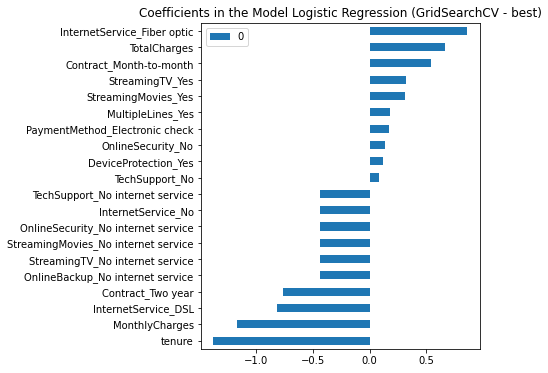

In [ ]:
plot_model_coefs(model_grid_logReg_scale.best_estimator_, 
                 "Logistic Regression (GridSearchCV - best)", 
                 X_transformed_colNames)


## <font color = 'blue'>***Findings:***</font>

<font color = 'blue'>*Characteristics of the Customers who are **less likely to churn (end the service)**:*</font>

* Greater Tenure
* Greater MonthlyCharges
* InteretService: DSL
* Contract: Two year

<font color = 'blue'>*Characteristics of the Customers who are **more likely to churn (end the service)**:*</font>

*   InternetService_Fiber optic
*   Greater TotalCharges
*   Contract_Month-to-month
*   StreamingTV_Yes
*   StreamingMovies_Yes



## <font color = 'blue'>Make predictions on the test data with the best model trained and evaluate the performance:</font>

### <font color = 'blue'>Transform the test data X_test:</font>

In [ ]:
## The column_trans_scale model has been fit to the training data and saved already,
## so just use transform instead of the fit.transform function with the new data here:
X_test_transformed_scaled = column_trans_scale.transform(X_test)


In [ ]:
## Validate whether the transformed training data and test data 
## have the same dimension (# of columns):
print(X_train_transformed_scaled.shape)
print(X_test_transformed_scaled.shape)


(5625, 45)
(1407, 45)


### <font color = 'blue'>Transform the test label y_test:</font>

In [ ]:
## Transform the categorical y_label using fit yLableBinarizer from Q2:
y_test_transformed = yLableBinarizer.transform(y_test)


In [ ]:
## Validate whether the transformed training data and test data 
## have the same dimension (# of columns):
print(y_train_transformed.shape)
print(y_test_transformed.shape)


(5625, 1)
(1407, 1)


### <font color = 'blue'>Predict test data with the Logistic Regression (GridSearchCV - best) model:</font>

In [ ]:
evaluate_model_prediction("Logistic Regression (GridSearchCV - best) on Test Data", 
                          model_grid_logReg_scale, 
                          X_test_transformed_scaled, 
                          y_test_transformed.ravel())



Model: Logistic Regression (GridSearchCV - best) on Test Data

R^2 Score: 0.07885556825843554
Mean Absoult Error: 0.19047619047619047
Mean Squared Error: 0.19047619047619047
Root Mean Squared Error: 0.4364357804719847

Predictions on The Target Variable:



,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1



--------------------------------------



In [ ]:
print("Prediction on The Test Data:")
print()
print(get_model_scores("Logistic Regression (GridSearchCV - best)", 
                 model_grid_logReg_scale.best_estimator_, 
                 X_test_transformed_scaled, y_test_transformed))

print()
print("---------------------------------------")
print()

print("Prediction on The Training Data:")
print()
print(get_model_scores("Logistic Regression (GridSearchCV - best)", 
                 model_grid_logReg_scale.best_estimator_, 
                 X_train_transformed_scaled, y_train_transformed))


Prediction on The Test Data:

{'name': 'Logistic Regression (GridSearchCV - best)', 'accuracy': 0.8095238095238095, 'precision': 0.7375415282392026, 'recall': 0.5401459854014599, 'f1': 0.6235955056179775, 'auc': 0.860533374373406, 'cv_mean_accuracy': 0.8009893743216981, 'cv_mean_precision': 0.6887936101369655, 'cv_mean_recall': 0.5913311783720248, 'cv_mean_f1': 0.6336223258098223, 'cv_mean_auc': 0.8529408953376935}

---------------------------------------

Prediction on The Training Data:

{'name': 'Logistic Regression (GridSearchCV - best)', 'accuracy': 0.8055111111111111, 'precision': 0.6499176276771005, 'recall': 0.5411522633744856, 'f1': 0.5905688622754492, 'auc': 0.8445978642696238, 'cv_mean_accuracy': 0.8039111111111111, 'cv_mean_precision': 0.6477265049591654, 'cv_mean_recall': 0.5370286682671939, 'cv_mean_f1': 0.5868990488545858, 'cv_mean_auc': 0.8412089227475402}



Model: Logistic Regression (GridSearchCV - best) on Test Data

              precision    recall  f1-score   support

          No       0.83      0.92      0.87       996
         Yes       0.74      0.54      0.62       411

    accuracy                           0.81      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.80      0.81      0.80      1407


Cross-Validation Scores:
[0.82269504 0.78723404 0.76868327 0.78647687 0.83985765]

Accuracy:
- CV Mean: 0.8010
- CV Standard Deviation: 0.0262

Confusion Matrix:
[[917  79]
 [189 222]]



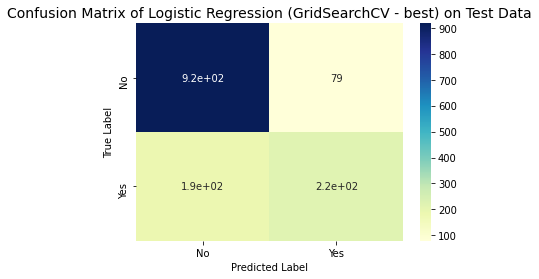


-----------------------------------------------------



In [ ]:
evaluate_model("Logistic Regression (GridSearchCV - best) on Test Data", 
               model_grid_logReg_scale.best_estimator_, 
               X_test_transformed_scaled, 
               y_test_transformed)


Model: Logistic Regression (GridSearchCV - best) on Training Data

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      4167
         Yes       0.65      0.54      0.59      1458

    accuracy                           0.81      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.80      0.81      0.80      5625


Cross-Validation Scores:
[0.81066667 0.8        0.79288889 0.8        0.816     ]

Accuracy:
- CV Mean: 0.8039
- CV Standard Deviation: 0.0083

Confusion Matrix:
[[3742  425]
 [ 669  789]]



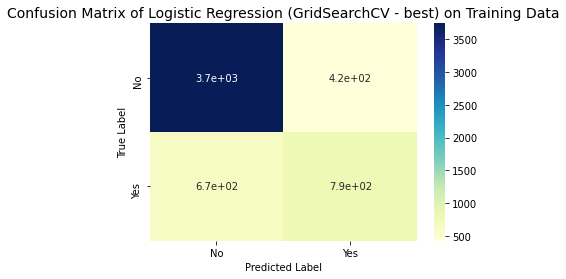


-----------------------------------------------------



In [ ]:
evaluate_model("Logistic Regression (GridSearchCV - best) on Training Data", 
               model_grid_logReg_scale.best_estimator_, 
               X_train_transformed_scaled, 
               y_train_transformed)


## <font color = 'blue'>***Findings:***</font>

<font color = 'blue'>*By fitting the selected best model Logistic Regression (GridSearchCV - best) to the test data and comparing the prediction performance with the model's training metrics, the results suggests that this model is stable on both training and test data. The test prediction achieves slightly higher scores on every metrics except accuracy, but accuracy is still very close to its training and cross-validation rates around 0.80.*</font>




---













# <font color = 'blue'>**Conclusion**</font>

<font color = 'blue'>The customer behavior patterns discovered from the data and the predictive model suggest that customers who --

*   have Fiber optic as the internet service provider,
*   are on the Month-to-Month contract,
*   streaming TV or movies, 
*   have stayed with the company for a very short time,
*   or spend very little on the company monthly

-- are at high churn risk.
<br><br>

Therefore, I recommend the marketing department emphasize marketing initiatives of retention programs. For instance, **promote exclusive offers to users on the Month-to-Month contract and have the Fiber optic internet if they upgrade to the Two-Year contract, partner or advertise on streaming services, improve onboarding & follow-up processes for new customers, to retain high-risk churners**.</font>